# Language in Space

## Session 10: Spatial autocorrelation and Moran's I

### Gerhard Jäger

January 20, 2022


In [2]:
library(repr)
options(repr.plot.width=20, repr.plot.height=13)

### Recap homework

sample solution

In [3]:
library(tidyverse)
library(tmap)
library(sf)

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──
✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
code for methods in class “Rcpp_SpExtent” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)
code for methods in class “Rcpp_SpExtent” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)
code for methods in class “Rcpp_SpPoly” was not checked for suspicious fiel

In [4]:
system("mkdir phoible")

In [5]:
phoibleZip = "phoible/phoible-v2.0.1.zip"

if(!file.exists(phoibleZip)) {
    download.file(
        "https://zenodo.org/record/2677911/files/cldf-datasets/phoible-v2.0.1.zip",
        dest = phoibleZip
    )
}


In [6]:
unzip(phoibleZip, exdir="phoible")

In [7]:
languages <- read_csv("phoible/cldf-datasets-phoible-f36deac/cldf/languages.csv") %>%
    drop_na() %>%
    st_as_sf(coords=c("Longitude", "Latitude"))
st_crs(languages) <- 4326


── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  ID = col_character(),
  Name = col_character(),
  Macroarea = col_character(),
  Latitude = col_double(),
  Longitude = col_double(),
  Glottocode = col_character(),
  ISO639P3code = col_character(),
  Family_Glottocode = col_character(),
  Family_Name = col_character()
)



In [8]:
languages %>%
    slice_head(n=10)

Warning message in fun(libname, pkgname):
“rgeos: versions of GEOS runtime 3.9.1-CAPI-1.14.2
and GEOS at installation 3.9.1dev-CAPI-1.14.1differ”Registered S3 method overwritten by 'geojsonsf':
  method        from   
  print.geojson geojson


ID,Name,Macroarea,Glottocode,ISO639P3code,Family_Glottocode,Family_Name,geometry
kore1280,Korean,Eurasia,kore1280,kor,kore1284,Koreanic,POINT (128 37.5)
kett1243,Ket,Eurasia,kett1243,ket,yeni1252,Yeniseian,POINT (87.5466 63.7551)
lakk1252,Lak,Eurasia,lakk1252,lbe,nakh1245,Nakh-Daghestanian,POINT (47.0809 42.1328)
kaba1278,Kabardian,Eurasia,kaba1278,kbd,abkh1242,Abkhaz-Adyge,POINT (43.3918 43.5082)
nucl1302,Georgian,Eurasia,nucl1302,kat,kart1248,Kartvelian,POINT (43.78613 41.8504)
kuru1302,Kurukh,Eurasia,kuru1302,kru,drav1251,Dravidian,POINT (86.4657 24.4644)
telu1262,Telugu,Eurasia,telu1262,tel,drav1251,Dravidian,POINT (78.7024 16.4529)
kota1263,Kota (India),Eurasia,kota1263,kfe,drav1251,Dravidian,POINT (76.9387 11.4978)
mund1320,Mundari,Eurasia,mund1320,unr,aust1305,Austroasiatic,POINT (87.1792 25.0391)
khar1287,Kharia,Eurasia,khar1287,khr,aust1305,Austroasiatic,POINT (84.3922 22.3571)


In [10]:
parameters <- read_csv("phoible/cldf-datasets-phoible-f36deac/cldf/parameters.csv")
parameters %>%
    slice_head(n=10)


── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  .default = col_character()
)
ℹ Use `spec()` for the full column specifications.



ID,Name,Description,SegmentClass,tone,stress,syllabic,short,long,consonantal,...,retractedTongueRoot,advancedTongueRoot,periodicGlottalSource,epilaryngealSource,spreadGlottis,constrictedGlottis,fortis,raisedLarynxEjective,loweredLarynxImplosive,click
72FB536ACFF408163656BBCDAFCAC6F6,a,LATIN SMALL LETTER A,vowel,0,-,+,-,-,-,...,-,-,+,-,-,-,0,-,-,0
2F272C9C5FA2DA70706B565B2DC46DE8,aː,LATIN SMALL LETTER A - MODIFIER LETTER TRIANGULAR COLON,vowel,0,-,+,-,+,-,...,-,-,+,-,-,-,0,-,-,0
B6D180EA250E6FBDE82C3D1F1BB4A39C,æ,LATIN SMALL LETTER AE,vowel,0,-,+,-,-,-,...,-,-,+,-,-,-,0,-,-,0
CB37024CEAE9409F30FC756C0578E93C,æː,LATIN SMALL LETTER AE - MODIFIER LETTER TRIANGULAR COLON,vowel,0,-,+,-,+,-,...,-,-,+,-,-,-,0,-,-,0
199408E3D0668F10F475143F0E8CC0CB,e,LATIN SMALL LETTER E,vowel,0,-,+,-,-,-,...,-,-,+,-,-,-,0,-,-,0
6DD56E3A80E90C3B1F5AC7AC45CE8180,eː,LATIN SMALL LETTER E - MODIFIER LETTER TRIANGULAR COLON,vowel,0,-,+,-,+,-,...,-,-,+,-,-,-,0,-,-,0
80E0B47CF9A1F002B35B6AAB49574C61,ɤ,LATIN SMALL LETTER RAMS HORN,vowel,0,-,+,-,-,-,...,-,-,+,-,-,-,0,-,-,0
5C19A8FEDB2B0124AA7C66E689586A64,ɤː,LATIN SMALL LETTER RAMS HORN - MODIFIER LETTER TRIANGULAR COLON,vowel,0,-,+,-,+,-,...,-,-,+,-,-,-,0,-,-,0
E7FBD92350B3CA8B7B5D77E36A607068,h,LATIN SMALL LETTER H,consonant,0,-,-,-,-,-,...,0,0,-,-,+,-,-,-,-,-
F0585BB57111C322D6E7DABB0D01F9EA,i,LATIN SMALL LETTER I,vowel,0,-,+,-,-,-,...,-,-,+,-,-,-,0,-,-,0


In [11]:
values <- read_csv("phoible//cldf-datasets-phoible-f36deac/cldf/values.csv")
values %>%
    slice_head(n=10)


── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  ID = col_double(),
  Language_ID = col_character(),
  Parameter_ID = col_character(),
  Value = col_character(),
  Code_ID = col_logical(),
  Comment = col_logical(),
  Source = col_character(),
  Marginal = col_logical(),
  Allophones = col_character(),
  Contribution_ID = col_double()
)



ID,Language_ID,Parameter_ID,Value,Code_ID,Comment,Source,Marginal,Allophones,Contribution_ID
1,kore1280,72FB536ACFF408163656BBCDAFCAC6F6,a,NA,NA,cho1967;martin1951;martin1954;martinlee1969;kim1968;kim1972,NA,a,1
2,kore1280,2F272C9C5FA2DA70706B565B2DC46DE8,aː,NA,NA,cho1967;martin1951;martin1954;martinlee1969;kim1968;kim1972,NA,aː,1
3,kore1280,B6D180EA250E6FBDE82C3D1F1BB4A39C,æ,NA,NA,cho1967;martin1951;martin1954;martinlee1969;kim1968;kim1972,NA,ɛ æ,1
4,kore1280,CB37024CEAE9409F30FC756C0578E93C,æː,NA,NA,cho1967;martin1951;martin1954;martinlee1969;kim1968;kim1972,NA,æː,1
5,kore1280,199408E3D0668F10F475143F0E8CC0CB,e,NA,NA,cho1967;martin1951;martin1954;martinlee1969;kim1968;kim1972,NA,e,1
6,kore1280,6DD56E3A80E90C3B1F5AC7AC45CE8180,eː,NA,NA,cho1967;martin1951;martin1954;martinlee1969;kim1968;kim1972,NA,eː,1
7,kore1280,80E0B47CF9A1F002B35B6AAB49574C61,ɤ,NA,NA,cho1967;martin1951;martin1954;martinlee1969;kim1968;kim1972,NA,ɤ,1
8,kore1280,5C19A8FEDB2B0124AA7C66E689586A64,ɤː,NA,NA,cho1967;martin1951;martin1954;martinlee1969;kim1968;kim1972,NA,ɤː,1
9,kore1280,E7FBD92350B3CA8B7B5D77E36A607068,h,NA,NA,cho1967;martin1951;martin1954;martinlee1969;kim1968;kim1972,NA,ç h ɦ,1
10,kore1280,F0585BB57111C322D6E7DABB0D01F9EA,i,NA,NA,cho1967;martin1951;martin1954;martinlee1969;kim1968;kim1972,NA,i,1


In [12]:
nSegments <- values %>%
    group_by(Language_ID) %>%
    summarise(nSegments = n()) %>%
    arrange(desc(nSegments))
nSegments %>%
    slice_head(n=10)

Language_ID,nSegments
kham1282,622
osse1243,483
dutc1256,395
stan1293,371
hind1269,342
gwan1268,323
lith1251,315
chec1245,309
iris1253,288
kaba1278,281


In [13]:
options(repr.plot.width=10, repr.plot.height=7)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


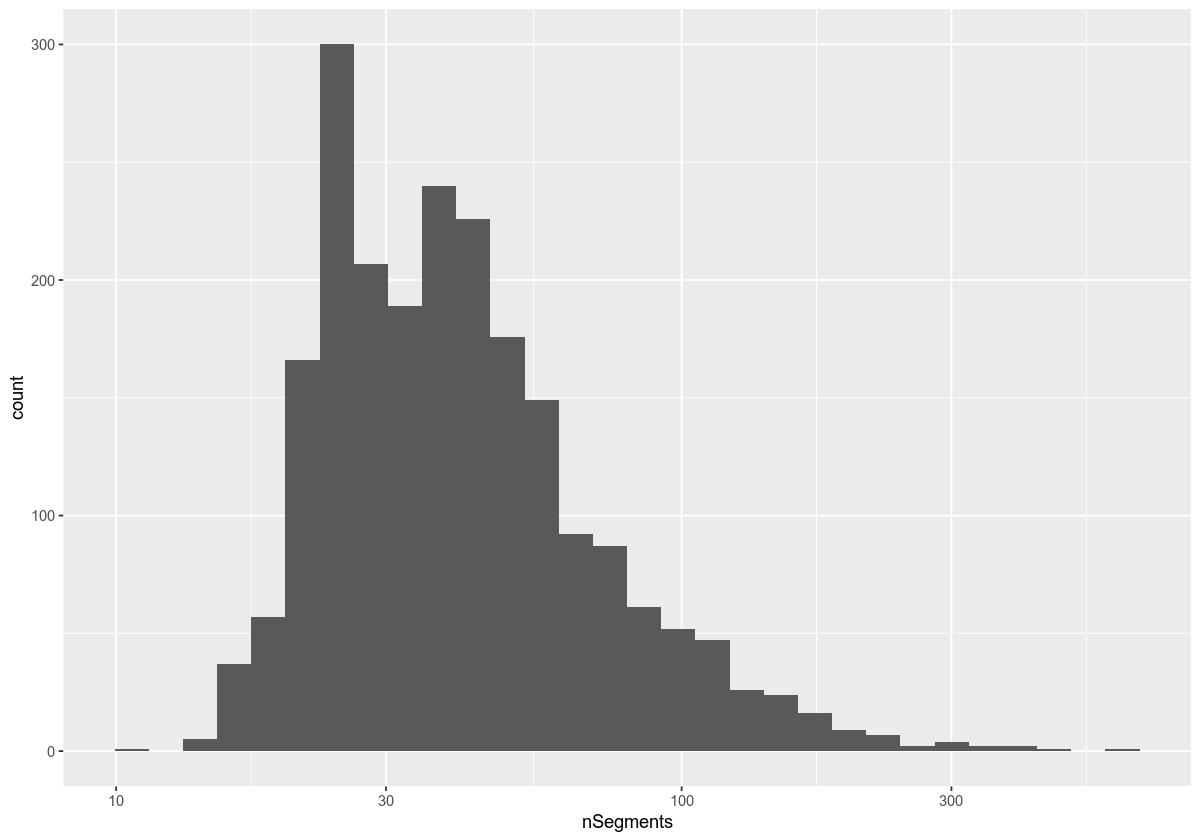

In [14]:
nSegments %>% 
    ggplot() +
    geom_histogram(aes(x=nSegments)) +
    scale_x_log10()

In [15]:
world.160e <- read_sf("data/world_160e.gpkg")

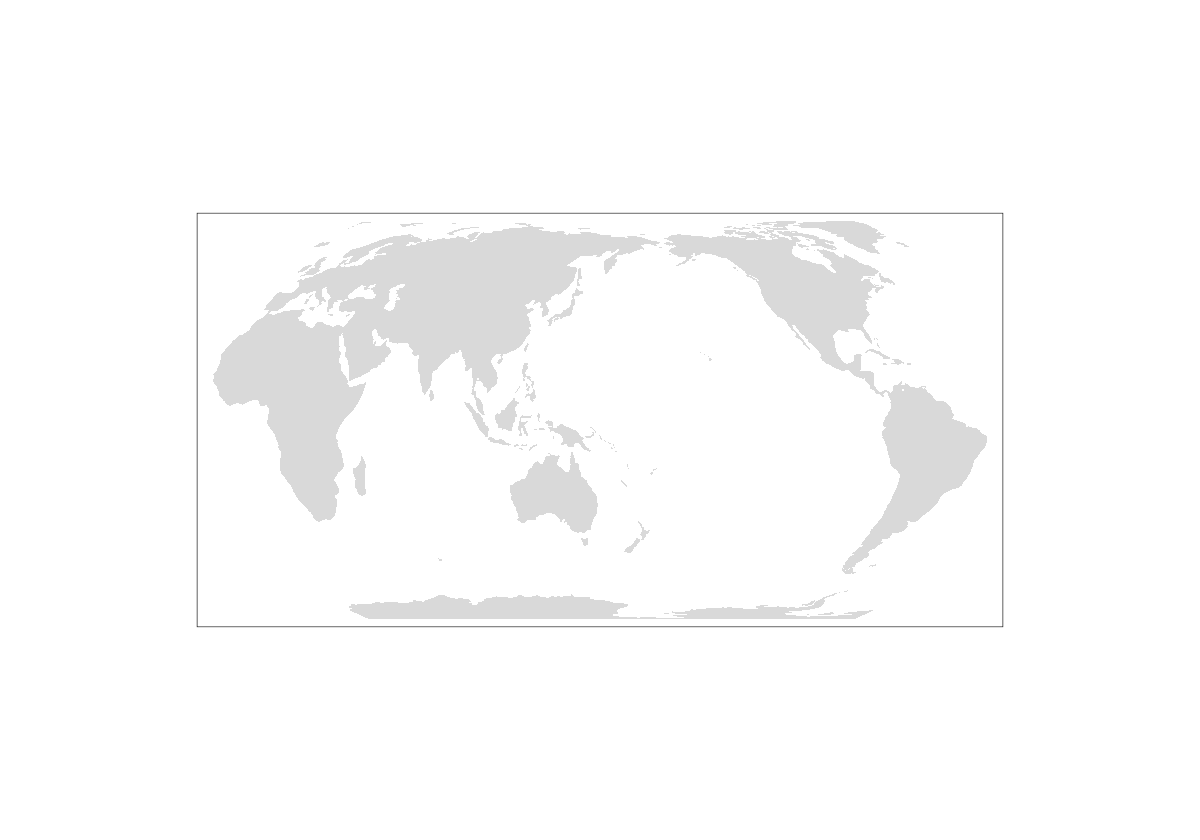

In [16]:
bg.map <- world.160e %>% 
    st_transform("+proj=eqearth lon_0=160") %>%
    tm_shape() +
    tm_fill()
bg.map

In [17]:
nSegments.sf <- languages %>%
    transmute(Language_ID = ID) %>%
    inner_join(nSegments)
nSegments.sf %>%
    slice_head(n=10)

Joining, by = "Language_ID"


Language_ID,geometry,nSegments
kore1280,POINT (128 37.5),158
kett1243,POINT (87.5466 63.7551),82
lakk1252,POINT (47.0809 42.1328),206
kaba1278,POINT (43.3918 43.5082),281
nucl1302,POINT (43.78613 41.8504),135
kuru1302,POINT (86.4657 24.4644),156
telu1262,POINT (78.7024 16.4529),206
kota1263,POINT (76.9387 11.4978),103
mund1320,POINT (87.1792 25.0391),195
khar1287,POINT (84.3922 22.3571),208


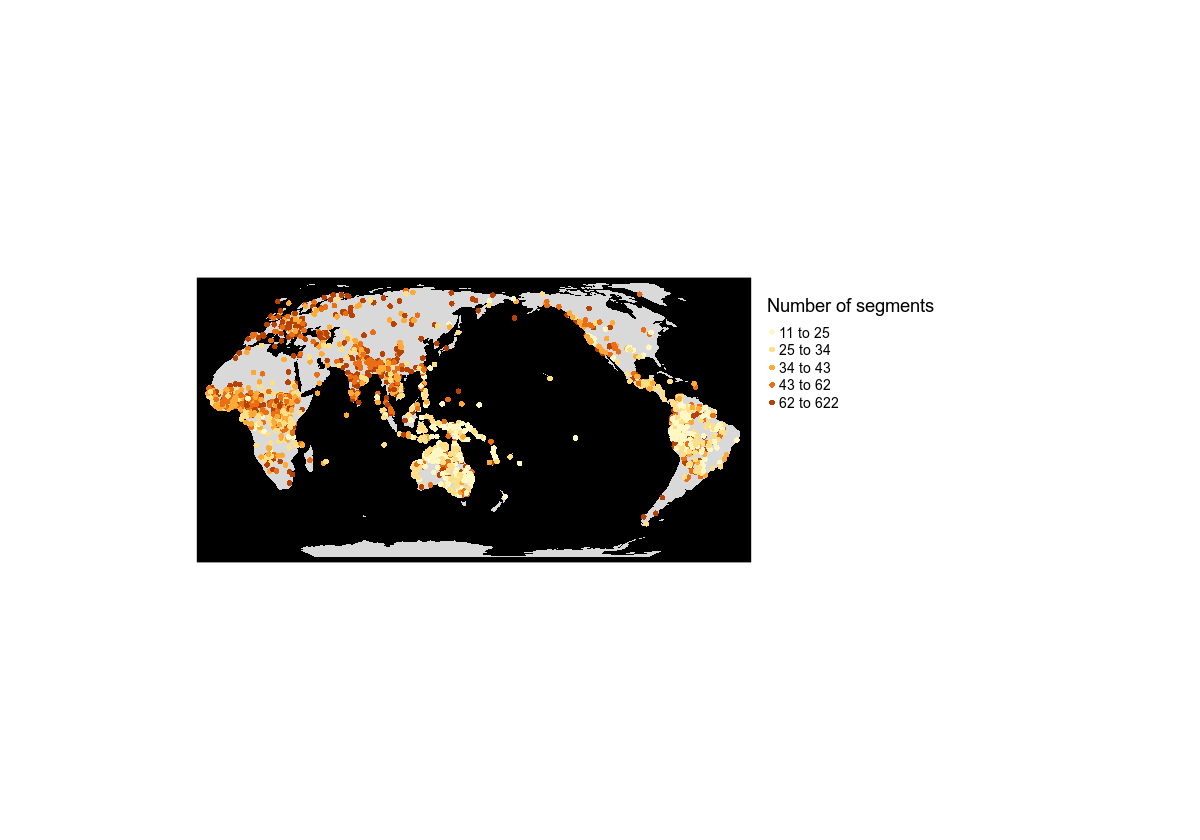

In [18]:
tmap_options(bg.color = "black", legend.text.color = "black")


solution <- bg.map +
    nSegments.sf %>%
    tm_shape() +
    tm_symbols(
        col="nSegments",
        style = "quantile",
        title.col = "Number of segments",
        size=0.1,
        border.lwd=0.02
    ) +
    tm_layout(legend.outside=T, scale=1) 
solution

# Spatial autocorrelation

(material taken from https://mgimond.github.io/Spatial/)


Suppose we have a collection of points on the earth's surface, and each point has a (numerical) feature value. We may ask the question: 

**Is the distribution of feature values random, or is there spatial structure?**

Technically, this amounts to the question whether the **spatial autocorrelation** is 0.


### Temporal autocorrelation

<img src=_img/Acf_new.svg width=500>
(image from Wikipedia)

<img src=_img/Random_maps.png>

**Moran's I** is a test statistic to test for spatial autocorrelation.



In [19]:
library(spdep)


Loading required package: sp
Loading required package: spData
To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source')`


In [20]:
load(url("https://github.com/mgimond/Spatial/raw/main/Data/moransI.RData"))


In [21]:
st_as_sf(s1)


,NAME,Income,NoSchool,NoSchoolSE,IncomeSE,geometry
0,Aroostook,21024,0.01338720,0.001406960,250.909,MULTIPOLYGON (((513821.1 51...
1,Somerset,21025,0.00521153,0.001150020,390.909,MULTIPOLYGON (((379071.8 50...
2,Piscataquis,21292,0.00633830,0.002128960,724.242,MULTIPOLYGON (((445039.5 51...
3,Penobscot,23307,0.00684534,0.001025450,242.424,MULTIPOLYGON (((472271.3 49...
4,Washington,20015,0.00478188,0.000966036,327.273,MULTIPOLYGON (((645446.5 49...
5,Franklin,21744,0.00508507,0.001641740,530.909,MULTIPOLYGON (((355457.9 50...
6,Oxford,21885,0.00700822,0.001318160,536.970,MULTIPOLYGON (((339726.8 49...
7,Waldo,23020,0.00498141,0.000918837,450.909,MULTIPOLYGON (((466941.8 49...
8,Kennebec,25652,0.00570358,0.000917087,360.000,MULTIPOLYGON (((410590 4926...
9,Androscoggin,24268,0.00830953,0.001178660,460.606,MULTIPOLYGON (((420086.1 48...


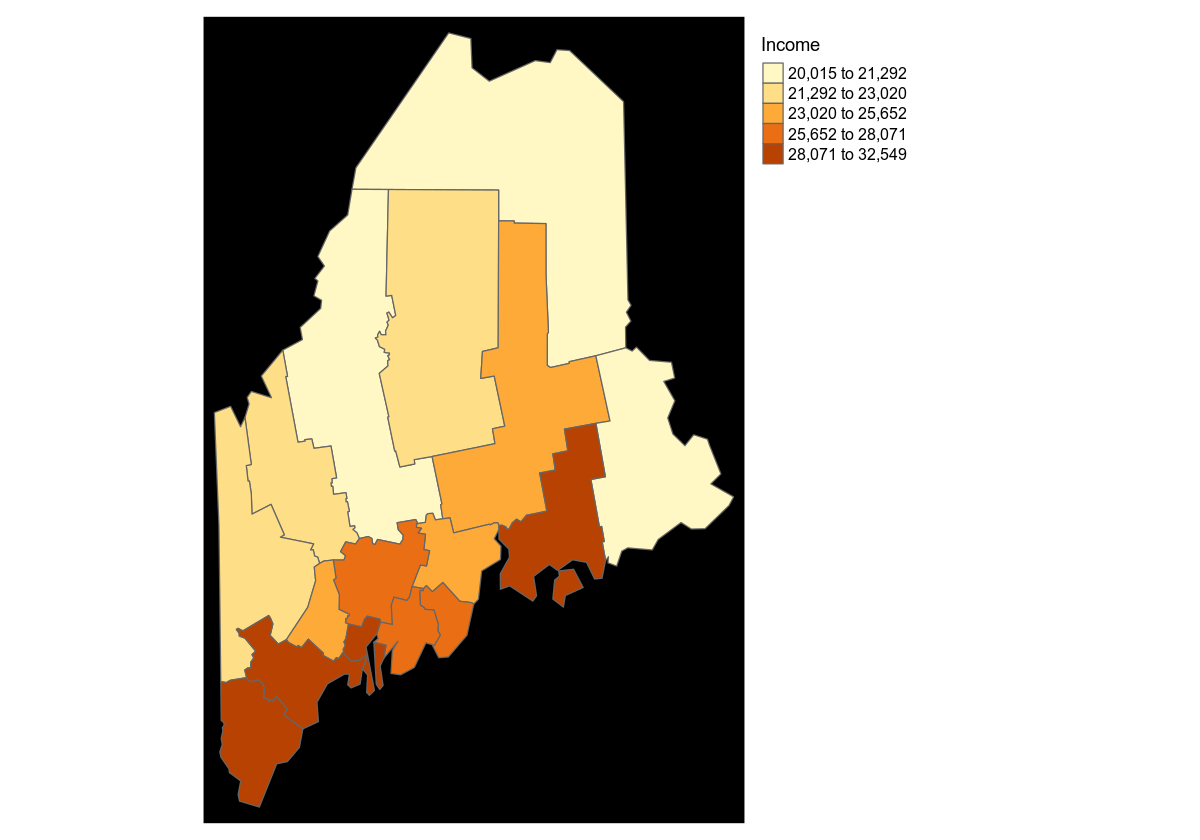

In [22]:
tm_shape(s1) + 
    tm_polygons(style="quantile", col = "Income") +
    tm_legend(outside = TRUE, text.size = .8) 

First we create a "neighbor list". Two regions are neighbors if they share a boundary. If we set the option `queen=TRUE`, even a shared point is sufficient.

In [23]:
nbm <- poly2nb(s1, queen=TRUE)
nbm

Neighbour list object:
Number of regions: 16 
Number of nonzero links: 66 
Percentage nonzero weights: 25.78125 
Average number of links: 4.125 

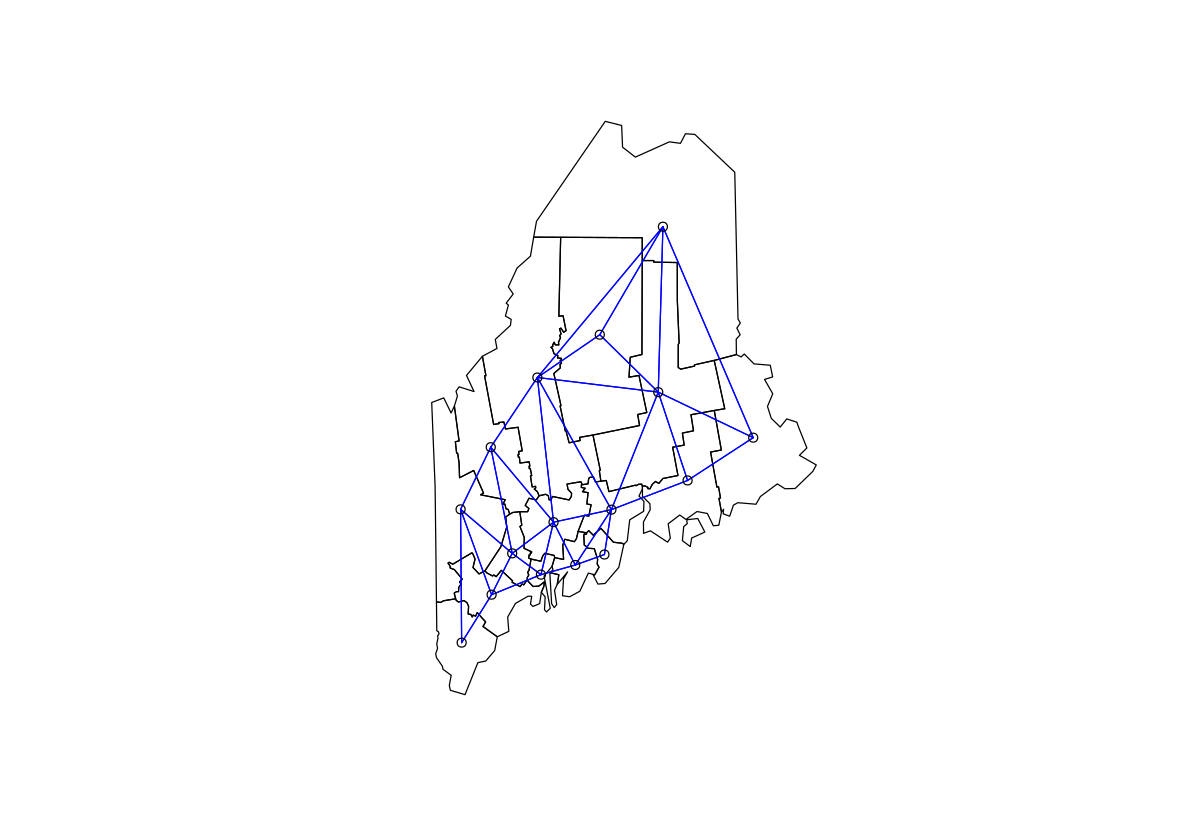

In [24]:
plot(s1)
plot.nb(nbm, s1, add=T, col='blue')

The corresponding adjacency matrix:

In [25]:
nmtx <- nb2mat(nbm)
rownames(nmtx) <- colnames(nmtx) <- s1$NAME
round(nmtx, 2)

,Aroostook,Somerset,Piscataquis,Penobscot,Washington,Franklin,Oxford,Waldo,Kennebec,Androscoggin,Hancock,Knox,Lincoln,Cumberland,Sagadahoc,York
Aroostook,0.00,0.25,0.25,0.25,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Somerset,0.17,0.00,0.17,0.17,0.00,0.17,0.00,0.17,0.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Piscataquis,0.33,0.33,0.00,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Penobscot,0.17,0.17,0.17,0.00,0.17,0.00,0.00,0.17,0.00,0.00,0.17,0.00,0.00,0.00,0.00,0.00
Washington,0.33,0.00,0.00,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.00,0.00,0.00,0.00,0.00
Franklin,0.00,0.25,0.00,0.00,0.00,0.00,0.25,0.00,0.25,0.25,0.00,0.00,0.00,0.00,0.00,0.00
Oxford,0.00,0.00,0.00,0.00,0.00,0.25,0.00,0.00,0.00,0.25,0.00,0.00,0.00,0.25,0.00,0.25
Waldo,0.00,0.17,0.00,0.17,0.00,0.00,0.00,0.00,0.17,0.00,0.17,0.17,0.17,0.00,0.00,0.00
Kennebec,0.00,0.17,0.00,0.00,0.00,0.17,0.00,0.17,0.00,0.17,0.00,0.00,0.17,0.00,0.17,0.00
Androscoggin,0.00,0.00,0.00,0.00,0.00,0.20,0.20,0.00,0.20,0.00,0.00,0.00,0.00,0.20,0.20,0.00


Next we assign weights to the edges of the neighborhood graph. For simplicity's sake, we assume equal weight for each neighbor.

In [26]:
lw <- nb2listw(nbm, style="W", zero.policy=TRUE)

In [27]:
lw$weights[1]

[[1]]
[1] 0.25 0.25 0.25 0.25

Then we compute the weighted average of the incomes of neighboring counties for each county.

In [28]:
Inc.lag <- lag.listw(lw, s1$Income)

In [30]:
st_as_sf(s1) %>%
    st_drop_geometry() %>%
    select(NAME, Income) %>%
    mutate(Inc.lag = Inc.lag)

,NAME,Income,Inc.lag
0,Aroostook,21024,21409.75
1,Somerset,21025,22673.17
2,Piscataquis,21292,21785.33
3,Penobscot,23307,22407.83
4,Washington,20015,24134.00
5,Franklin,21744,23207.50
6,Oxford,21885,26764.25
7,Waldo,23020,25505.83
8,Kennebec,25652,24336.33
9,Androscoggin,24268,25990.40


Doing some exploratory data analysis:

`geom_smooth()` using formula 'y ~ x'


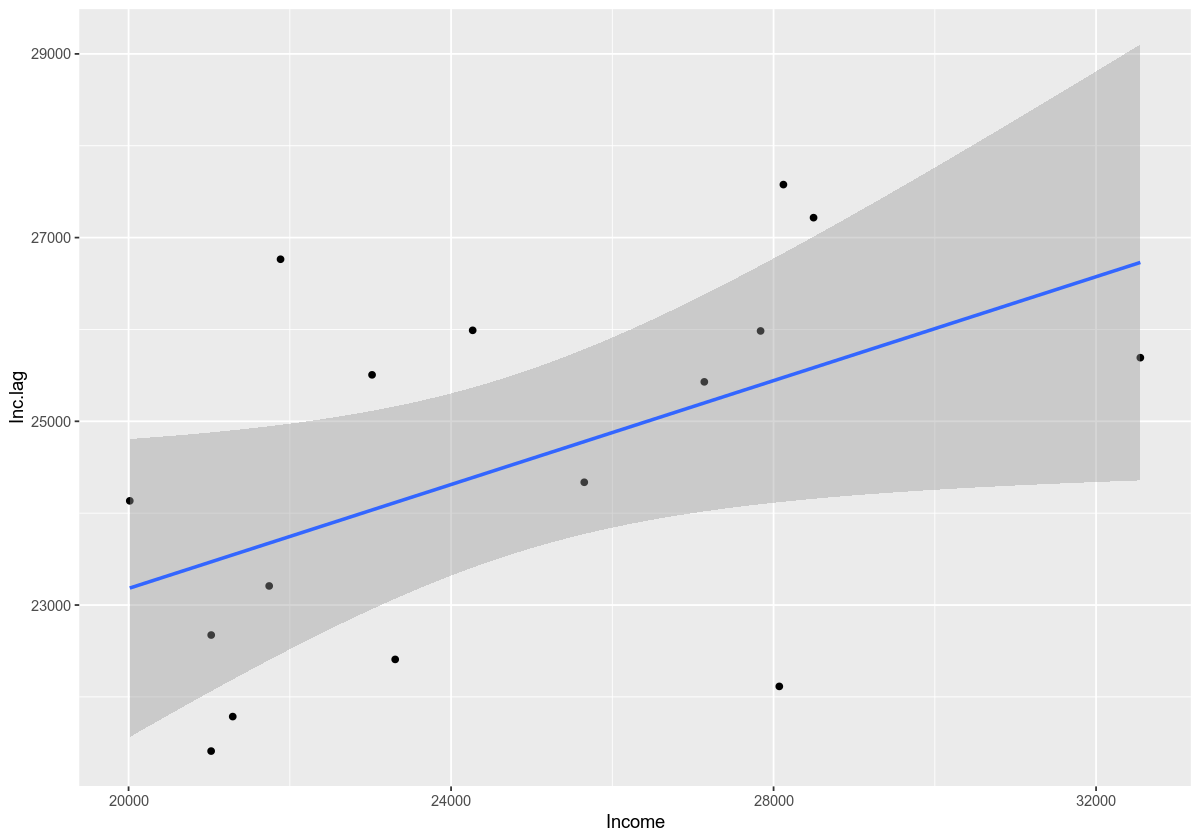

In [31]:
st_as_sf(s1) %>%
    st_drop_geometry() %>%
    select(NAME, Income) %>%
    mutate(Inc.lag = Inc.lag) %>%
    ggplot() +
    geom_point(aes(x=Income, y=Inc.lag)) +
    geom_smooth(aes(x=Income, y=Inc.lag), method=lm)

The slope of the regression line is Moran's I.



Spelling out the mathematics:

Let $N$ be the number of points and $w_{ij}$ the *weight* (strength of influence) between points $i$ and $j$. $w_{ii} =0$ for all $i$. 

$$
\begin{aligned}
I &= \frac{N}{W} \frac{\sum_{i,j} w_{ij}(x_i-\overline{x})(x_j-\overline{x})}{\sum_i(x_i-\overline{x})^2}\\
W &= \sum_{ij} w_{ij}\\
\overline x &= \frac{\sum_i x_i}{N}
\end{aligned}
$$

$I$ ranges from $-1$ to $1$. The expected value in the absence of spatial autocorrelation is 
$
\frac{-1}{N-1}
$


See https://www.statology.org/morans-i/ for examples.

In [32]:
M <- lm(Inc.lag ~ s1$Income)
summary(M)


Call:
lm(formula = Inc.lag ~ s1$Income)

Residuals:
    Min      1Q  Median      3Q     Max 
-3349.2 -1204.7  -106.7  1504.0  3050.5 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.752e+04  3.217e+03   5.448 8.58e-05 ***
s1$Income   2.828e-01  1.288e-01   2.195   0.0455 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1813 on 14 degrees of freedom
Multiple R-squared:  0.256,	Adjusted R-squared:  0.2029 
F-statistic: 4.818 on 1 and 14 DF,  p-value: 0.04552


In [33]:
coef(M)[2]

s1$Income 
0.2828111

To assess significance, we can the a random permutation test.

In [36]:
n <- 999   # Define the number of simulations
I.r <- vector(length=n)  # Create an empty vector

for (i in 1:n){
  # Randomly shuffle income values
  x <- sample(s1$Income, replace=FALSE)
  # Compute new set of lagged values
  x.lag <- lag.listw(lw, x)
  # Compute the regression slope and store its value
  M.r    <- lm(x.lag ~ x)
  I.r[i] <- coef(M.r)[2]
}

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


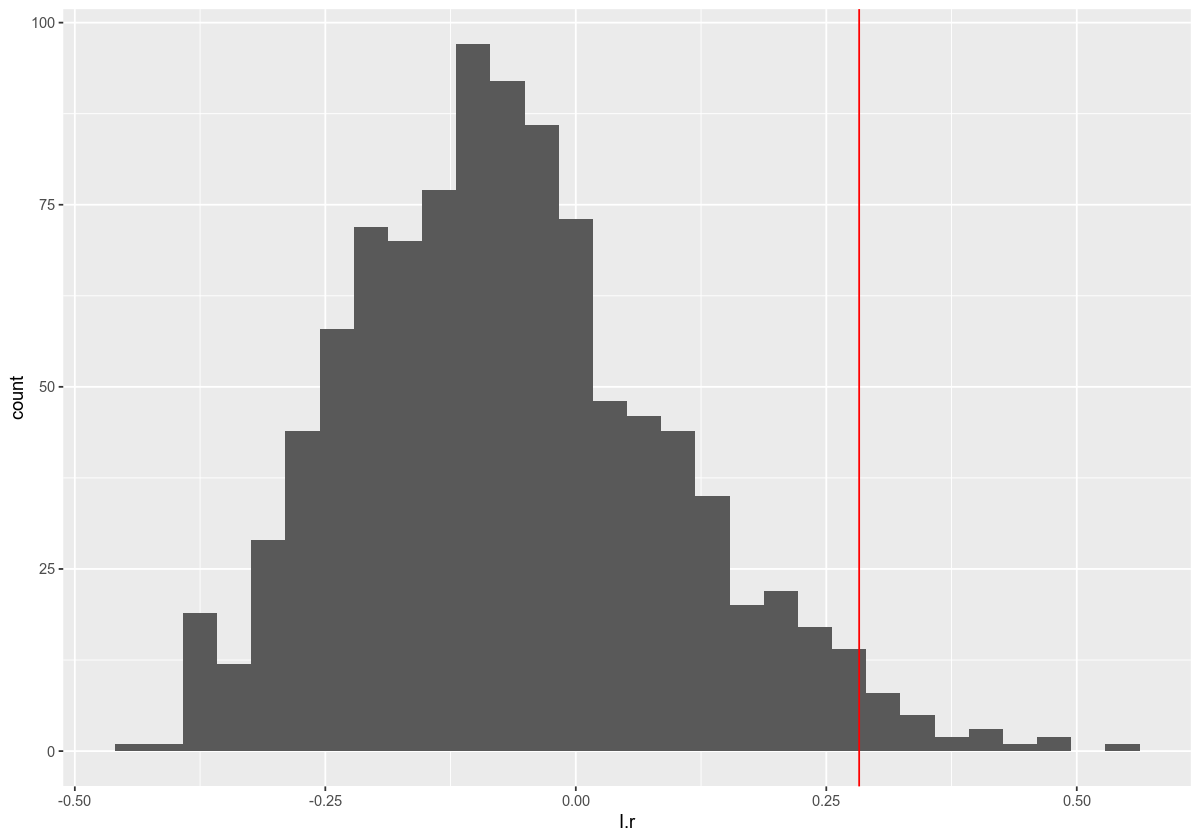

In [37]:
data.frame(I.r = I.r) %>%
    ggplot() +
    geom_histogram(aes(x=I.r)) +
    geom_vline(xintercept=coef(M)[2], col='red')


Pseudo-$p$-value:

In [38]:
mean(I.r > coef(M)[2])

[1] 0.02702703

The Moran test does not use permutations but computes the $p$-value analytically.

In [39]:
moran.test(s1$Income,lw)


	Moran I test under randomisation

data:  s1$Income  
weights: lw    

Moran I statistic standard deviate = 2.2472, p-value = 0.01231
alternative hypothesis: greater
sample estimates:
Moran I statistic       Expectation          Variance 
       0.28281108       -0.06666667        0.02418480 


There is also a version of Moran's I test using simulations:


In [41]:
MC<- moran.mc(s1$Income, lw, nsim=999)

# View results (including p-value)
MC


	Monte-Carlo simulation of Moran I

data:  s1$Income 
weights: lw  
number of simulations + 1: 1000 

statistic = 0.28281, observed rank = 984, p-value = 0.016
alternative hypothesis: greater


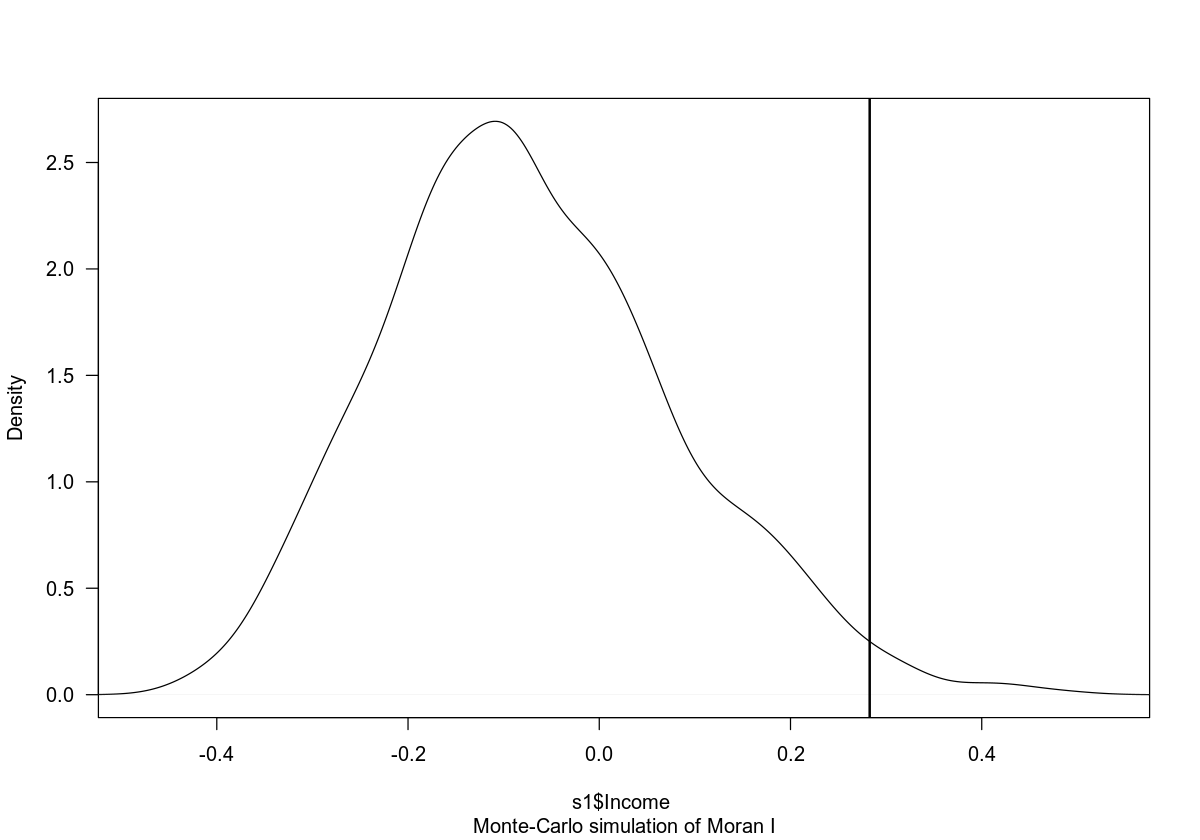

In [42]:
# Plot the distribution (note that this is a density plot instead of a histogram)
plot(MC, main="", las=1)

## Application to German dialect data



In [43]:
pad_voronoi <- read_sf("data/pad_voronoi.shp")

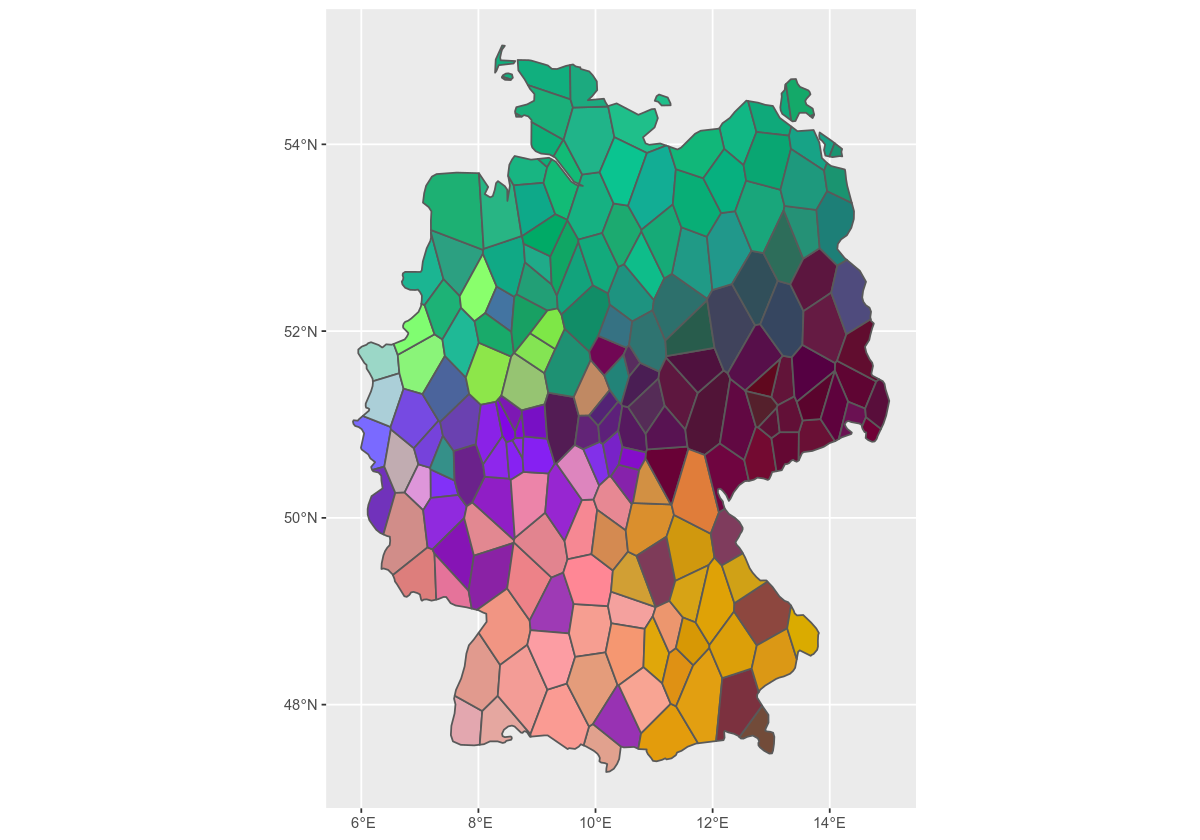

In [44]:
pad_voronoi %>%
    ggplot() +
    geom_sf(fill=pad_voronoi$col)

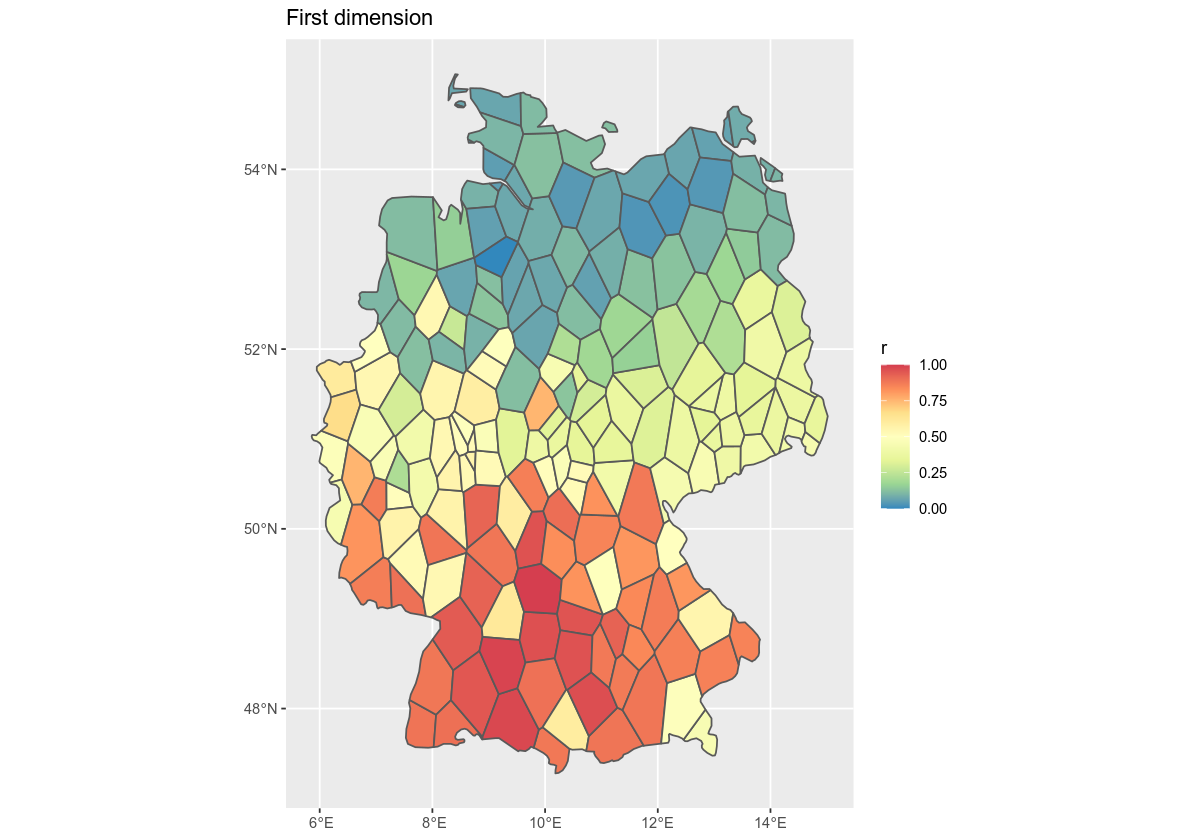

In [46]:
pad_voronoi %>%
    ggplot() +
    geom_sf(aes(fill=r)) +
    scale_fill_distiller(palette = "Spectral") +
    ggtitle("First dimension")

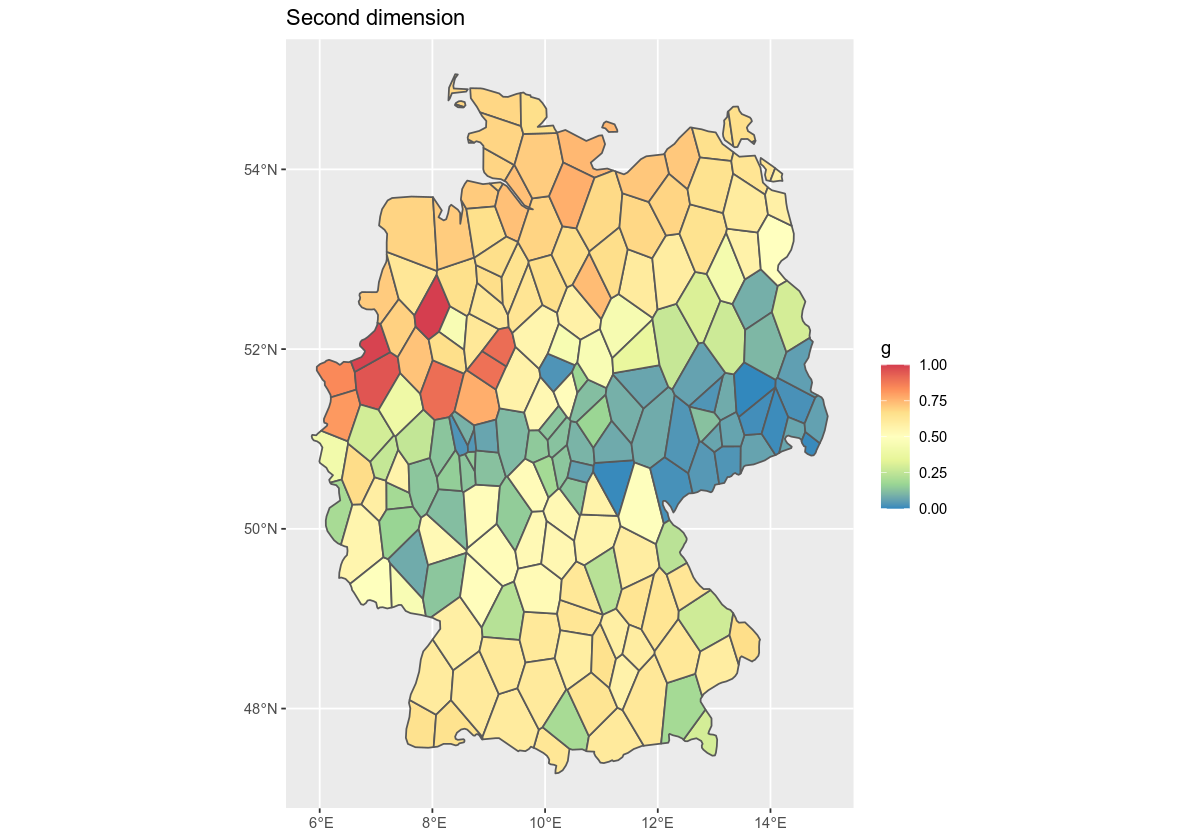

In [47]:
pad_voronoi %>%
    ggplot() +
    geom_sf(aes(fill=g)) +
    scale_fill_distiller(palette = "Spectral") +
    ggtitle("Second dimension")
    


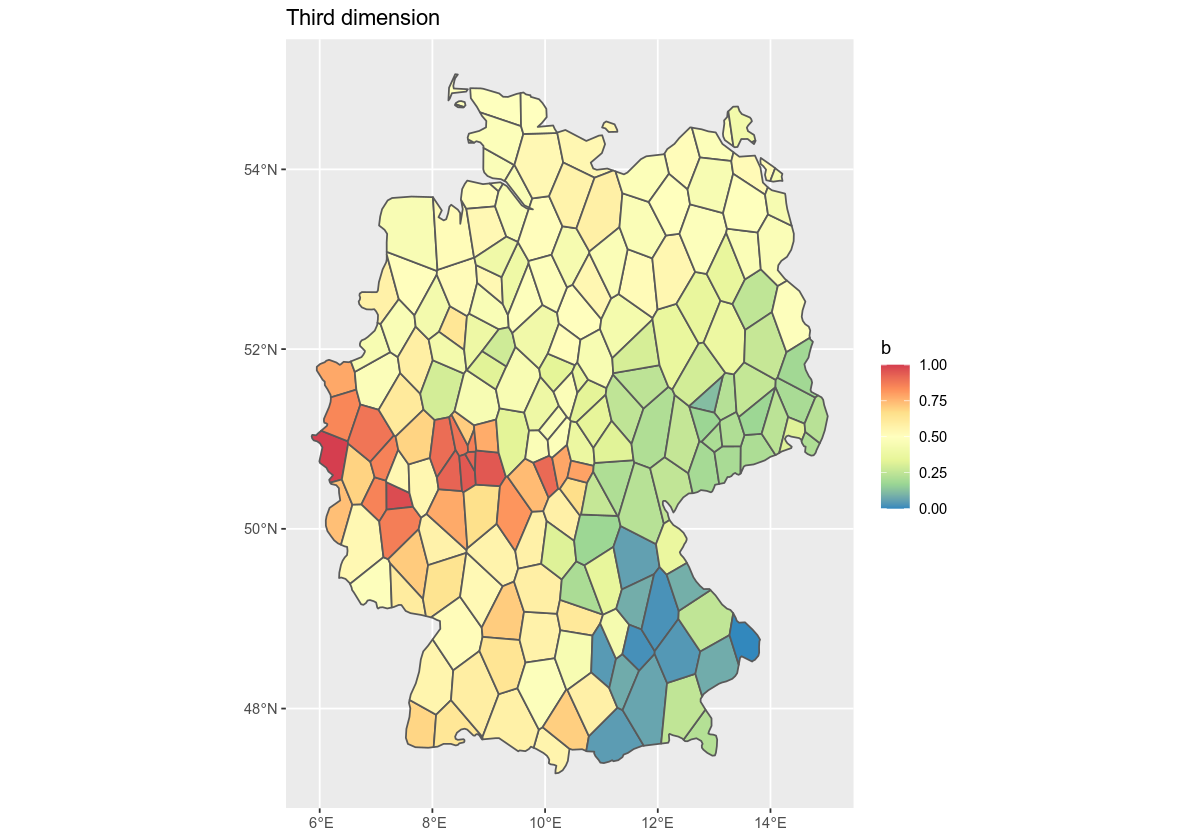

In [48]:
pad_voronoi %>%
    ggplot() +
    geom_sf(aes(fill=b)) +
scale_fill_distiller(palette = "Spectral") +
    ggtitle("Third dimension")

Just from eyeballing, it seems likely that the three MDS-dimensions have a strong spatial autocorrelation. Let us test this using Moran's I.

In [49]:
pad_nb <- poly2nb(pad_voronoi, queen=TRUE)

In [50]:
pad_nb

Neighbour list object:
Number of regions: 182 
Number of nonzero links: 978 
Percentage nonzero weights: 2.952542 
Average number of links: 5.373626 

although coordinates are longitude/latitude, st_union assumes that they are planar


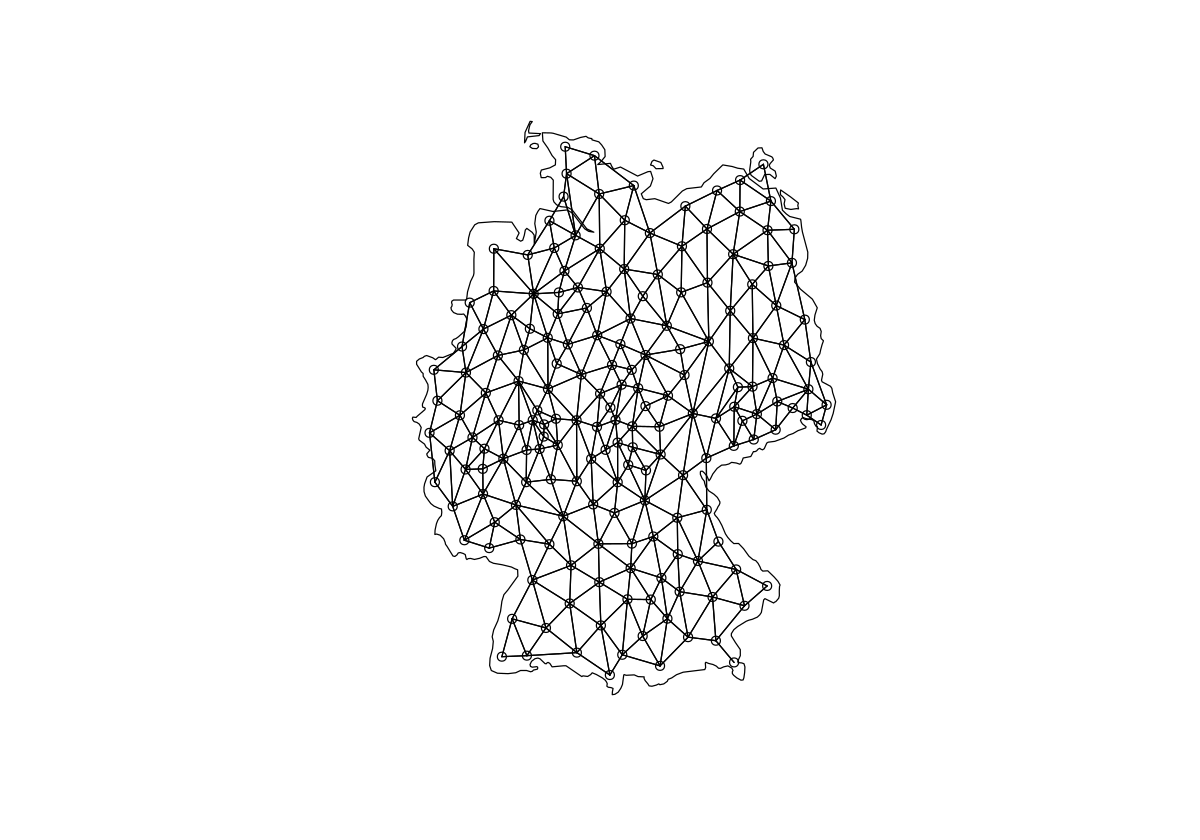

In [51]:
pad_voronoi %>%
    st_geometry() %>%
    st_union() %>%
    plot()
plot(pad_nb, as(pad_voronoi, 'Spatial'), add=T)

Side remark: The neighbor relation obtained from the Voronoi tesselation of a set of points is the [Delaunay triangulation](https://en.wikipedia.org/wiki/Delaunay_triangulation).

In [52]:
pad_lw <- nb2listw(pad_nb, style="W", zero.policy = T)

### First dimension ("r")

In [53]:
moran.test(pad_voronoi$r, pad_lw)


	Moran I test under randomisation

data:  pad_voronoi$r  
weights: pad_lw    

Moran I statistic standard deviate = 17.613, p-value < 2.2e-16
alternative hypothesis: greater
sample estimates:
Moran I statistic       Expectation          Variance 
      0.806618293      -0.005524862       0.002126112 


In [55]:
(pad_mc <- moran.mc(pad_voronoi$r, pad_lw, nsim=9999))


	Monte-Carlo simulation of Moran I

data:  pad_voronoi$r 
weights: pad_lw  
number of simulations + 1: 10000 

statistic = 0.80662, observed rank = 10000, p-value = 1e-04
alternative hypothesis: greater


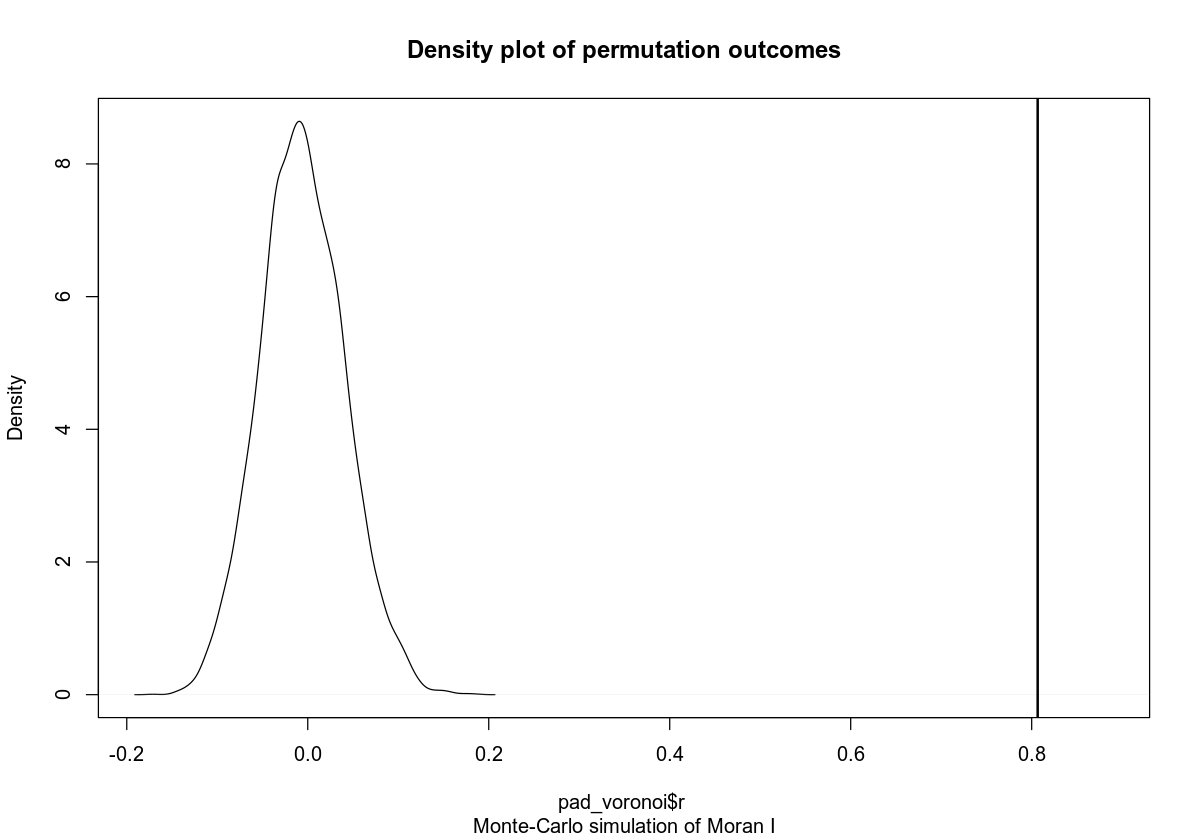

In [56]:
plot(pad_mc)

### Second dimension ("g")

In [57]:
moran.test(pad_voronoi$g, pad_lw)


	Moran I test under randomisation

data:  pad_voronoi$g  
weights: pad_lw    

Moran I statistic standard deviate = 14.493, p-value < 2.2e-16
alternative hypothesis: greater
sample estimates:
Moran I statistic       Expectation          Variance 
      0.663010589      -0.005524862       0.002127757 


In [58]:
(pad_mc <- moran.mc(pad_voronoi$g, pad_lw, nsim=9999))


	Monte-Carlo simulation of Moran I

data:  pad_voronoi$g 
weights: pad_lw  
number of simulations + 1: 10000 

statistic = 0.66301, observed rank = 10000, p-value = 1e-04
alternative hypothesis: greater


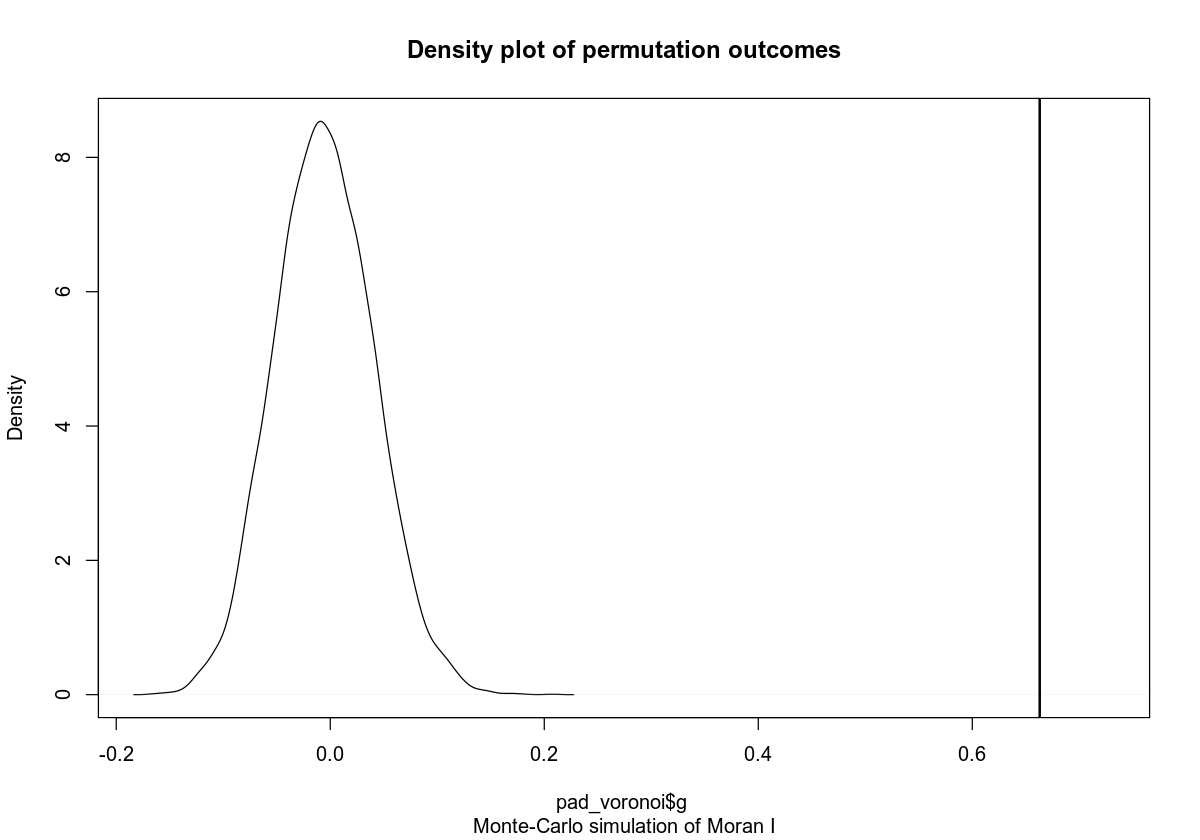

In [59]:
plot(pad_mc)

### Third dimension ("b")

In [60]:
moran.test(pad_voronoi$b, pad_lw)


	Moran I test under randomisation

data:  pad_voronoi$b  
weights: pad_lw    

Moran I statistic standard deviate = 15.021, p-value < 2.2e-16
alternative hypothesis: greater
sample estimates:
Moran I statistic       Expectation          Variance 
      0.685372436      -0.005524862       0.002115487 


In [62]:
(pad_mc <- moran.mc(pad_voronoi$b, pad_lw, nsim=9999))


	Monte-Carlo simulation of Moran I

data:  pad_voronoi$b 
weights: pad_lw  
number of simulations + 1: 10000 

statistic = 0.68537, observed rank = 10000, p-value = 1e-04
alternative hypothesis: greater


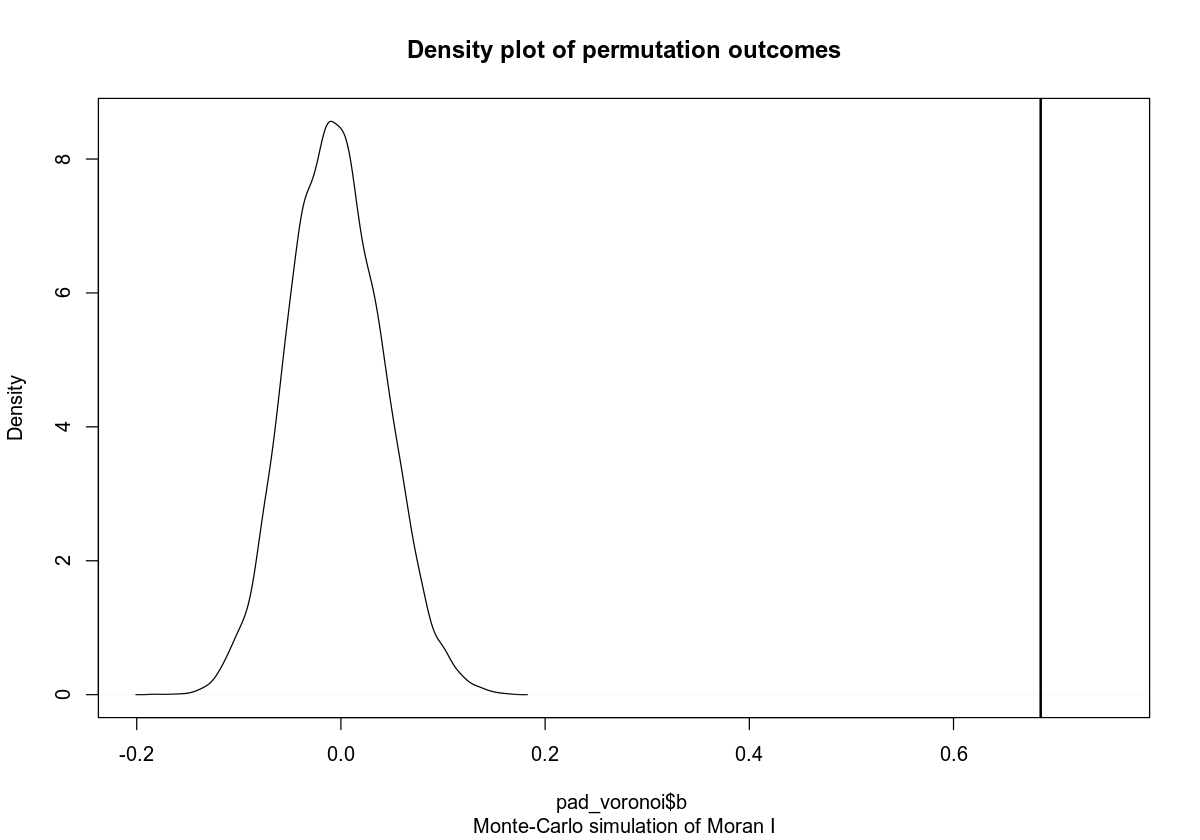

In [63]:
plot(pad_mc)

### a look at the linear regression

In [64]:
r.lag = lag.listw(pad_lw, pad_voronoi$r)
g.lag = lag.listw(pad_lw, pad_voronoi$g)
b.lag = lag.listw(pad_lw, pad_voronoi$b)

`geom_smooth()` using formula 'y ~ x'


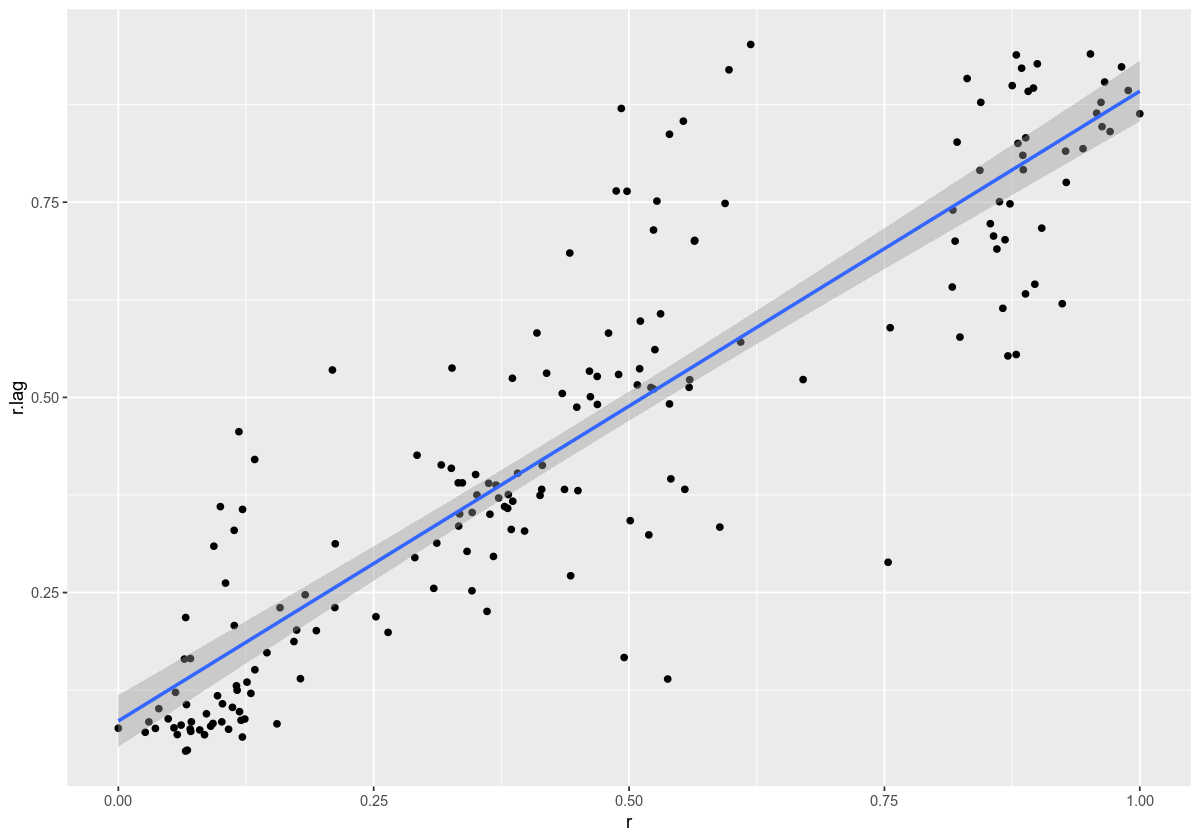

In [65]:
st_as_sf(pad_voronoi) %>%
    st_drop_geometry() %>%
    select(r) %>%
    mutate(r.lag = r.lag) %>%
    ggplot() +
    geom_point(aes(x=r, y=r.lag)) +
    geom_smooth(aes(x=r, y=r.lag), method=lm)

`geom_smooth()` using formula 'y ~ x'


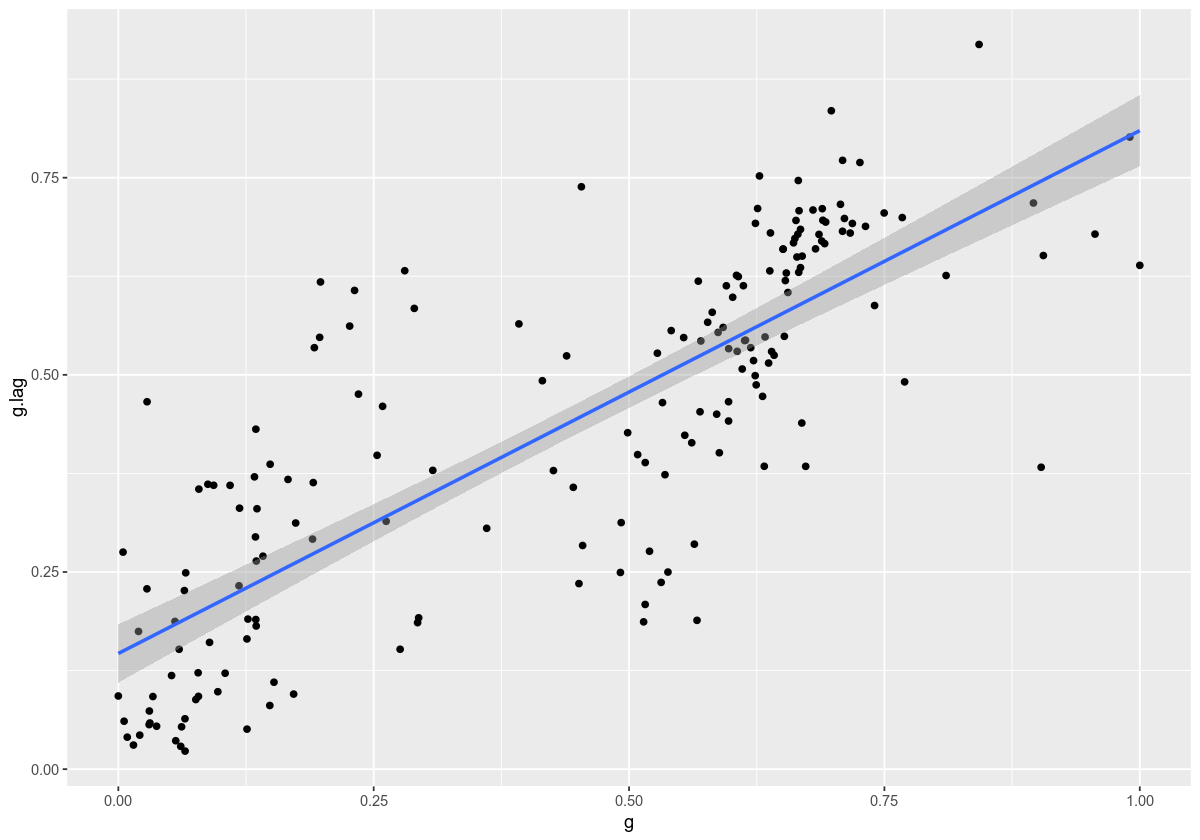

In [66]:
st_as_sf(pad_voronoi) %>%
    st_drop_geometry() %>%
    select(g) %>%
    mutate(g.lag = g.lag) %>%
    ggplot() +
    geom_point(aes(x=g, y=g.lag)) +
    geom_smooth(aes(x=g, y=g.lag), method=lm)

`geom_smooth()` using formula 'y ~ x'


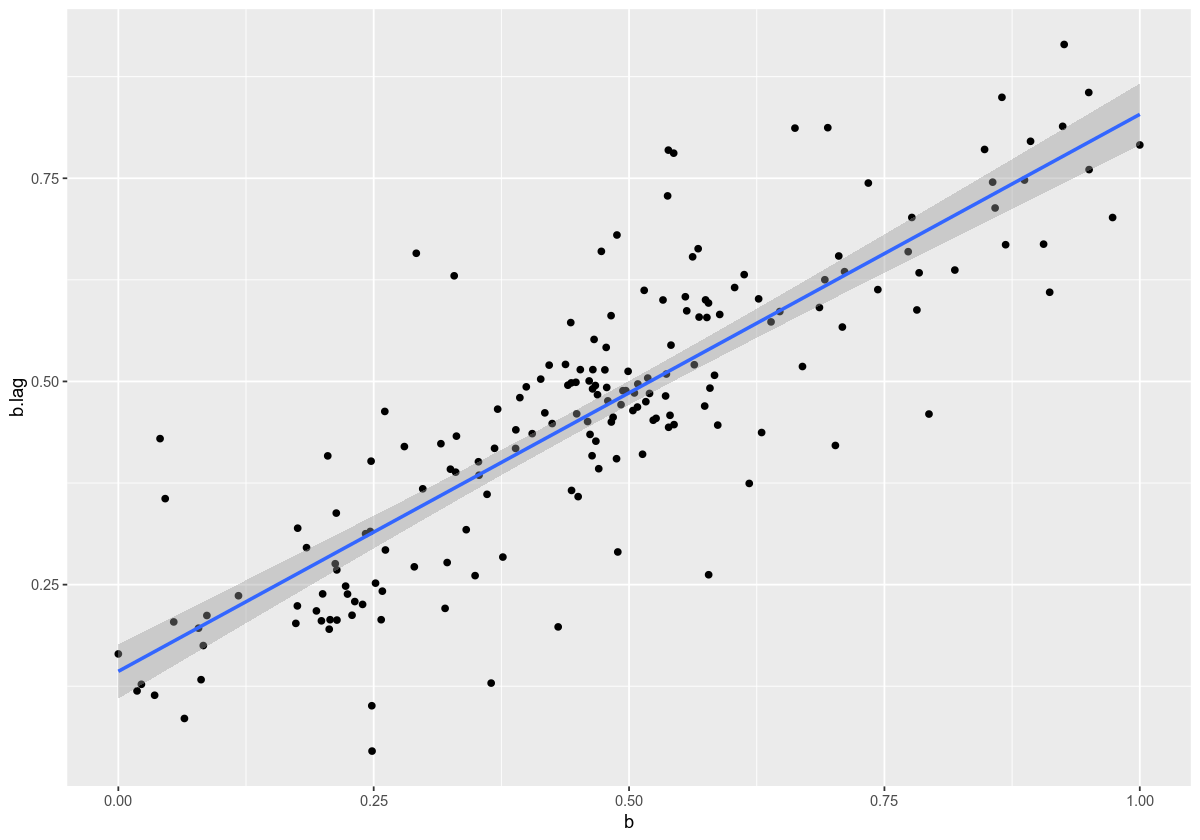

In [67]:
st_as_sf(pad_voronoi) %>%
    st_drop_geometry() %>%
    select(b) %>%
    mutate(b.lag = b.lag) %>%
    ggplot() +
    geom_point(aes(x=b, y=b.lag)) +
    geom_smooth(aes(x=b, y=b.lag), method=lm)

## Definitions of *neighborhood*

The value of Moran's I (and many other things in geostatistics) depend on how *neighborhood* and *neighborhood weights* are defined. In the following we will explore various common options and their impact on Moran's I.

Let us forget the Voronoi polygons for the time being and return to the original point data.

In [68]:
pad = read_csv("data/pad_mds.csv")

pad %>% slice_head(n=10)


── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  doculect = col_character(),
  LONGITUDE = col_double(),
  LATITUDE = col_double(),
  col = col_character(),
  r = col_double(),
  g = col_double(),
  b = col_double()
)



doculect,LONGITUDE,LATITUDE,col,r,g,b
Docelles,6.61615,48.14471,#E180A4,0.8819625,0.5008112,0.64290518
Schachach,11.40528,48.46679,#DF9114,0.8751002,0.5677925,0.07852466
Pielenhofen,11.95648,49.07279,#DFA206,0.8729309,0.6366345,0.02257775
Oberviehbach,12.37579,48.58109,#DC9F09,0.8626297,0.6244695,0.03554154
Maibrunn,12.78140,49.01600,#8D473F,0.5531598,0.2803814,0.24840166
Hartenstein,11.52376,49.59651,#D0980E,0.8170172,0.5974103,0.05424797
Langenbruck,11.51153,48.63820,#D79805,0.8443453,0.5952431,0.01832458
Gelting,11.81097,48.19687,#E29F11,0.8859810,0.6218752,0.06470765
Pöttmes,11.09074,48.58242,#E0A70A,0.8791276,0.6555337,0.04086412
Schauenstein,11.74264,50.27822,#E07D3A,0.8790252,0.4915463,0.22880538


In [69]:
coo <- pad %>%
    select(LONGITUDE, LATITUDE) %>%
    as.matrix()

In [110]:
S.dist  <-  dnearneigh(coo, 0, 100, longlat=T) 

In [111]:
S.dist

Neighbour list object:
Number of regions: 183 
Number of nonzero links: 2452 
Percentage nonzero weights: 7.321807 
Average number of links: 13.39891 

In [112]:
pad_sf <- st_as_sf(pad, coords=c("LONGITUDE", "LATITUDE"))

although coordinates are longitude/latitude, st_union assumes that they are planar


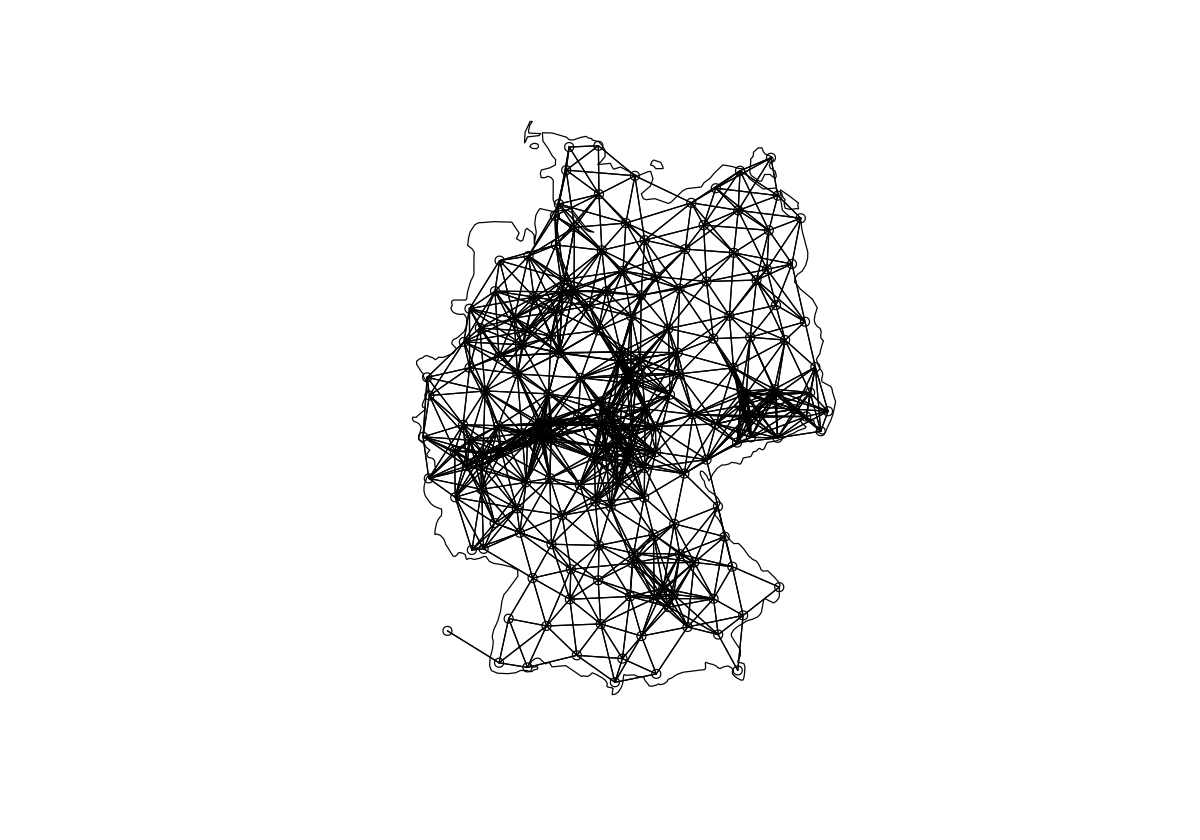

In [113]:
pad_voronoi %>%
    st_geometry() %>%
    st_union() %>%
    plot()
plot.nb(S.dist, st_geometry(pad_sf), add=T)

In [114]:
lw <- nb2listw(S.dist, style="W",zero.policy=T) 

In [115]:
MI  <-  moran.mc(pad$r, lw, nsim=999,zero.policy=T) 

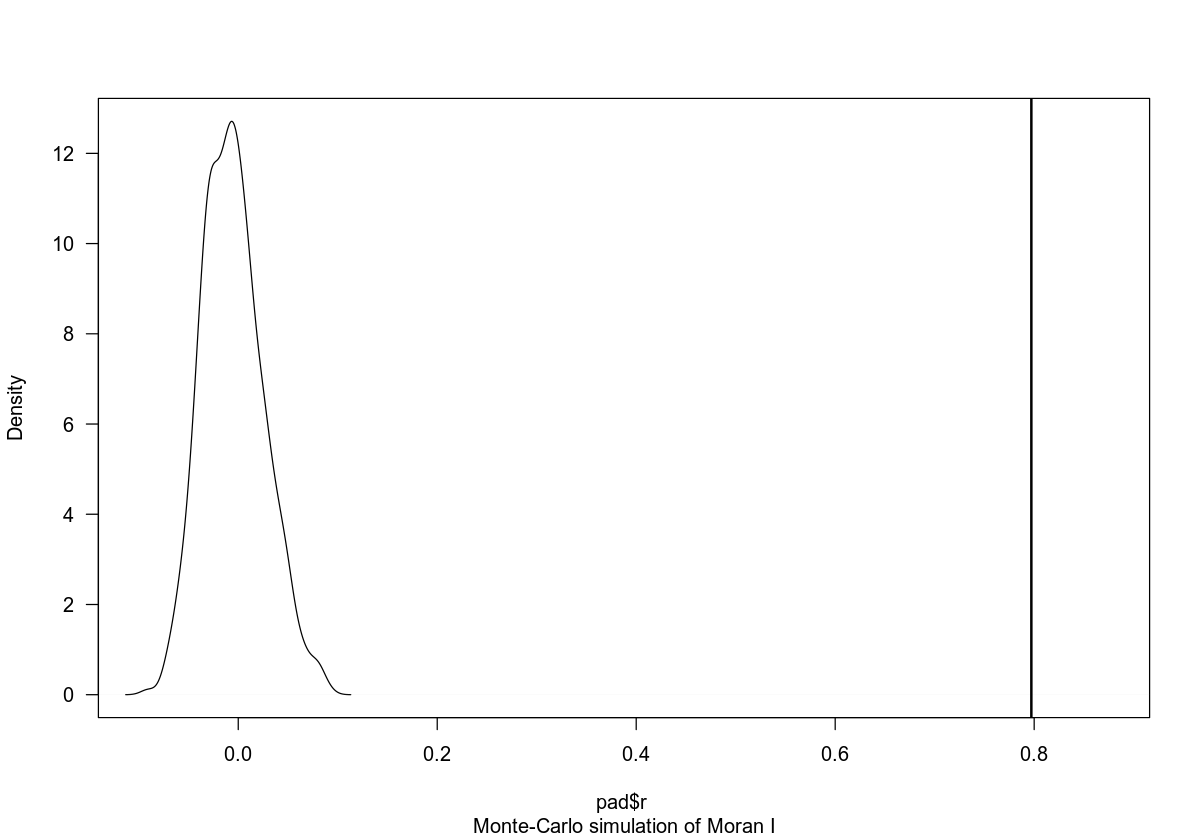

In [116]:
plot(MI, main="", las=1) 

In [117]:
MI


	Monte-Carlo simulation of Moran I

data:  pad$r 
weights: lw  
number of simulations + 1: 1000 

statistic = 0.79717, observed rank = 1000, p-value = 0.001
alternative hypothesis: greater


## Spatial correlograms

The choice of the distance threshold for neighborhood seems arbitrary. 

A **correlogram** computes Moran's I for different distance bins and plots them. This allows to assess the radius of effective spatial autocorrelation.

First step: define a function that computes Moran's I for a given distance interval.

In [118]:
dist2mi <- function(x, coo, lower, upper) {
    S.dist  <-  dnearneigh(coo, lower, upper, longlat=T) 
    lw <- nb2listw(S.dist, style="W",zero.policy=T) 
    return(moran.mc(x, lw, nsim=999,zero.policy=T))
}

In [119]:
dist2mi(pad$r, coo, 0, 10)


	Monte-Carlo simulation of Moran I

data:  x 
weights: lw  
number of simulations + 1: 1000 

statistic = 0.0085873, observed rank = 654, p-value = 0.346
alternative hypothesis: greater


Second step: computer Moran's I for each bin.

In [120]:
nBins <- 80
binWidth <- 10
binCenters <- binWidth*(1:nBins)-binWidth/2

In [121]:
crlg.r <- c()
for (i in 1:nBins) {
    binCenter <- binCenters[i]
    MI <- dist2mi(pad$r, coo, binCenter-binWidth/2, binCenter+binWidth/2)
    mi <- as.numeric(MI$statistic)
    signif <- MI$p.value < 0.05
    crlg.r <- rbind(crlg.r, c(binCenter, mi, signif))
}

Third step: convert the results into a tibble and plot them with `ggplot`. Significance of the Moran test is indicated by color.

In [122]:
df.r <- tibble(data.frame(crlg.r))
colnames(df.r) <- c("distance", "I", "significant")
df.r$significant <- as.character(df.r$significant)


In [123]:
options(repr.plot.width=30, repr.plot.height=10)

`geom_smooth()` using formula 'y ~ s(x, bs = "cs")'


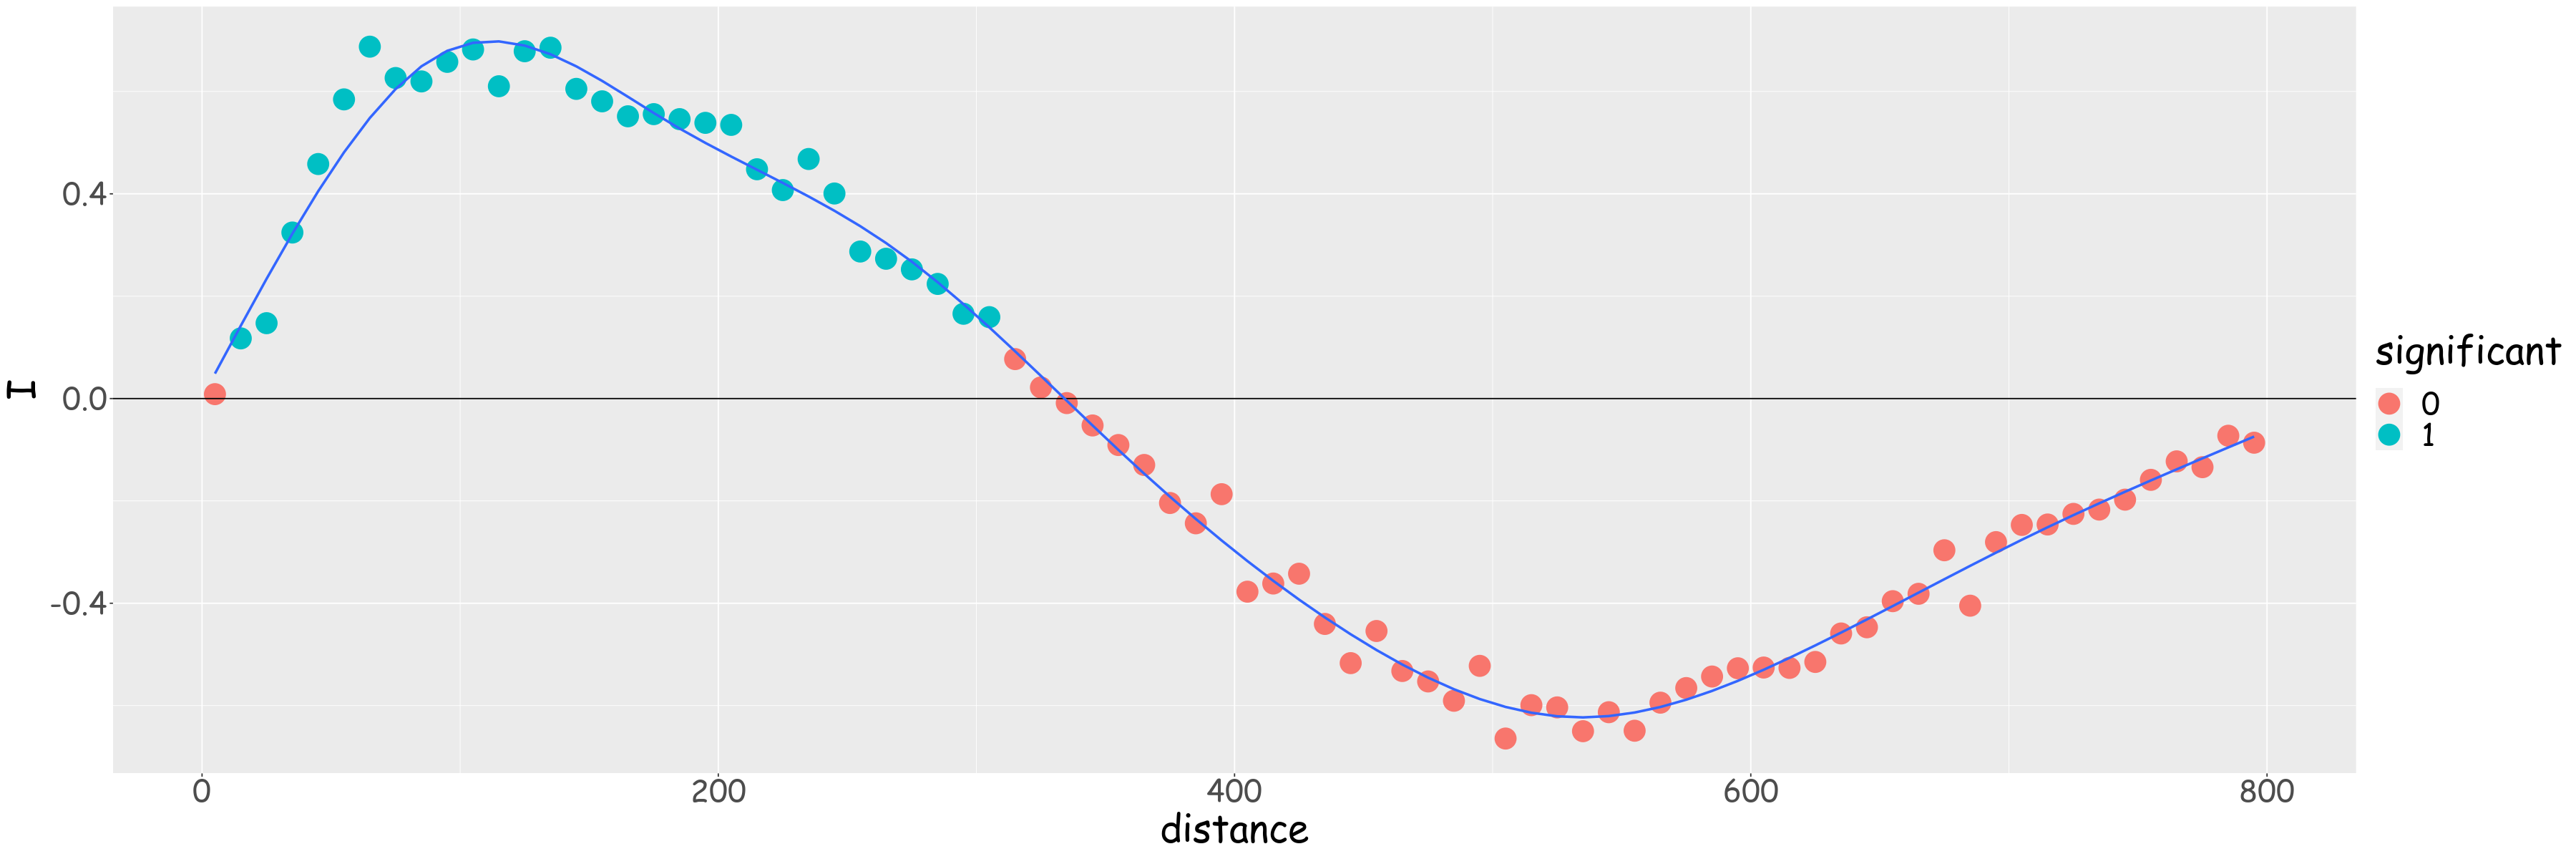

In [124]:
 df.r %>%
    ggplot() +
    geom_point(aes(x=distance, y=I, col=significant),size=8) +
    geom_hline(yintercept = 0) +
    theme(text=element_text(size=32,  family="Comic Sans MS")) +
    geom_smooth(aes(x=distance, y=I), method="gam", se=F)


Same procedure for the `b` and `g` variables:

`geom_smooth()` using formula 'y ~ s(x, bs = "cs")'


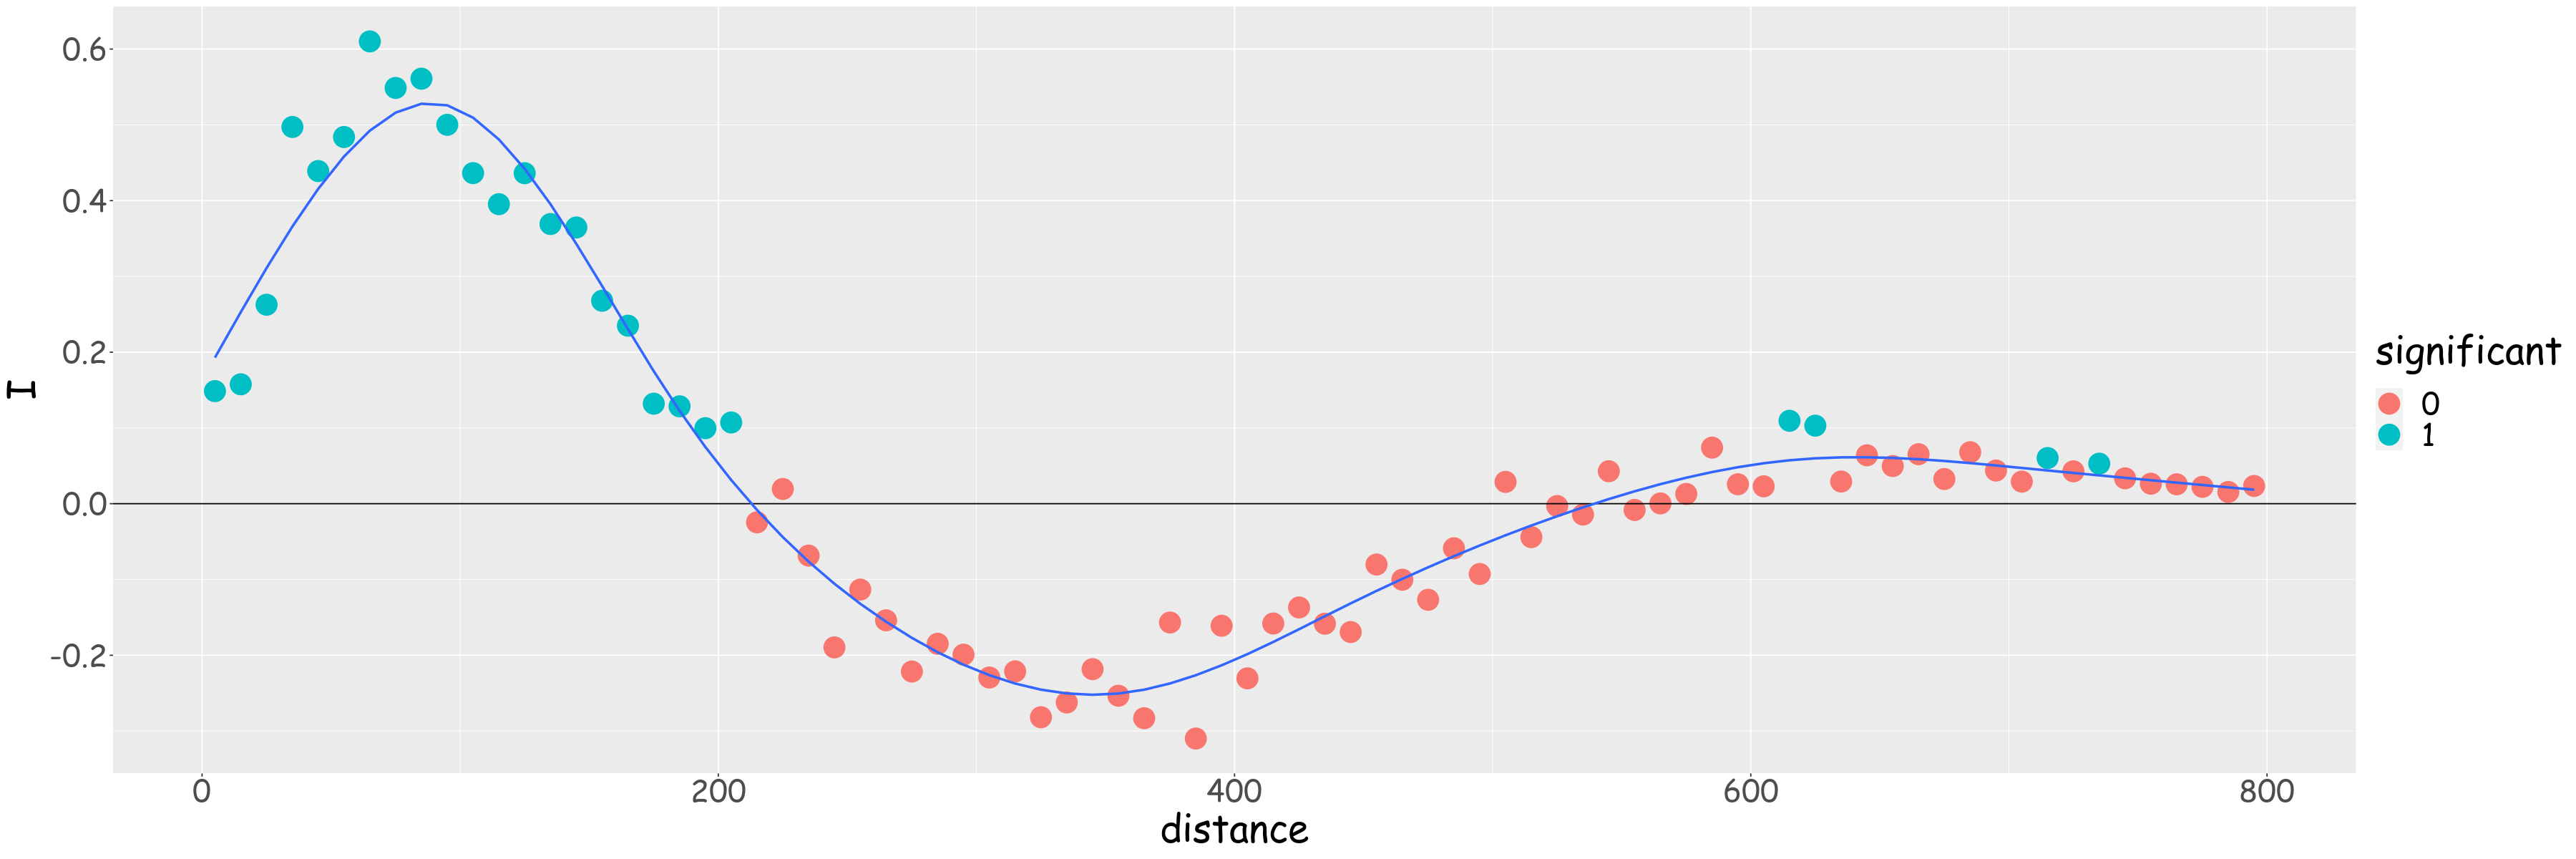

In [125]:
crlg.g <- c()
for (i in 1:nBins) {
    binCenter <- binCenters[i]
    MI <- dist2mi(pad$g, coo, binCenter-binWidth/2, binCenter+binWidth/2)
    mi <- as.numeric(MI$statistic)
    signif <- MI$p.value < 0.05
    crlg.g <- rbind(crlg.g, c(binCenter, mi, signif))
}
df.g <- tibble(data.frame(crlg.g))
colnames(df.g) <- c("distance", "I", "significant")
df.g$significant <- as.character(df.g$significant)
df.g %>%
    ggplot() +
    geom_point(aes(x=distance, y=I, col=significant),size=8) +
    geom_hline(yintercept = 0) +
    theme(text=element_text(size=32,  family="Comic Sans MS")) +
    geom_smooth(aes(x=distance, y=I), method="gam", se=F)


`geom_smooth()` using formula 'y ~ s(x, bs = "cs")'


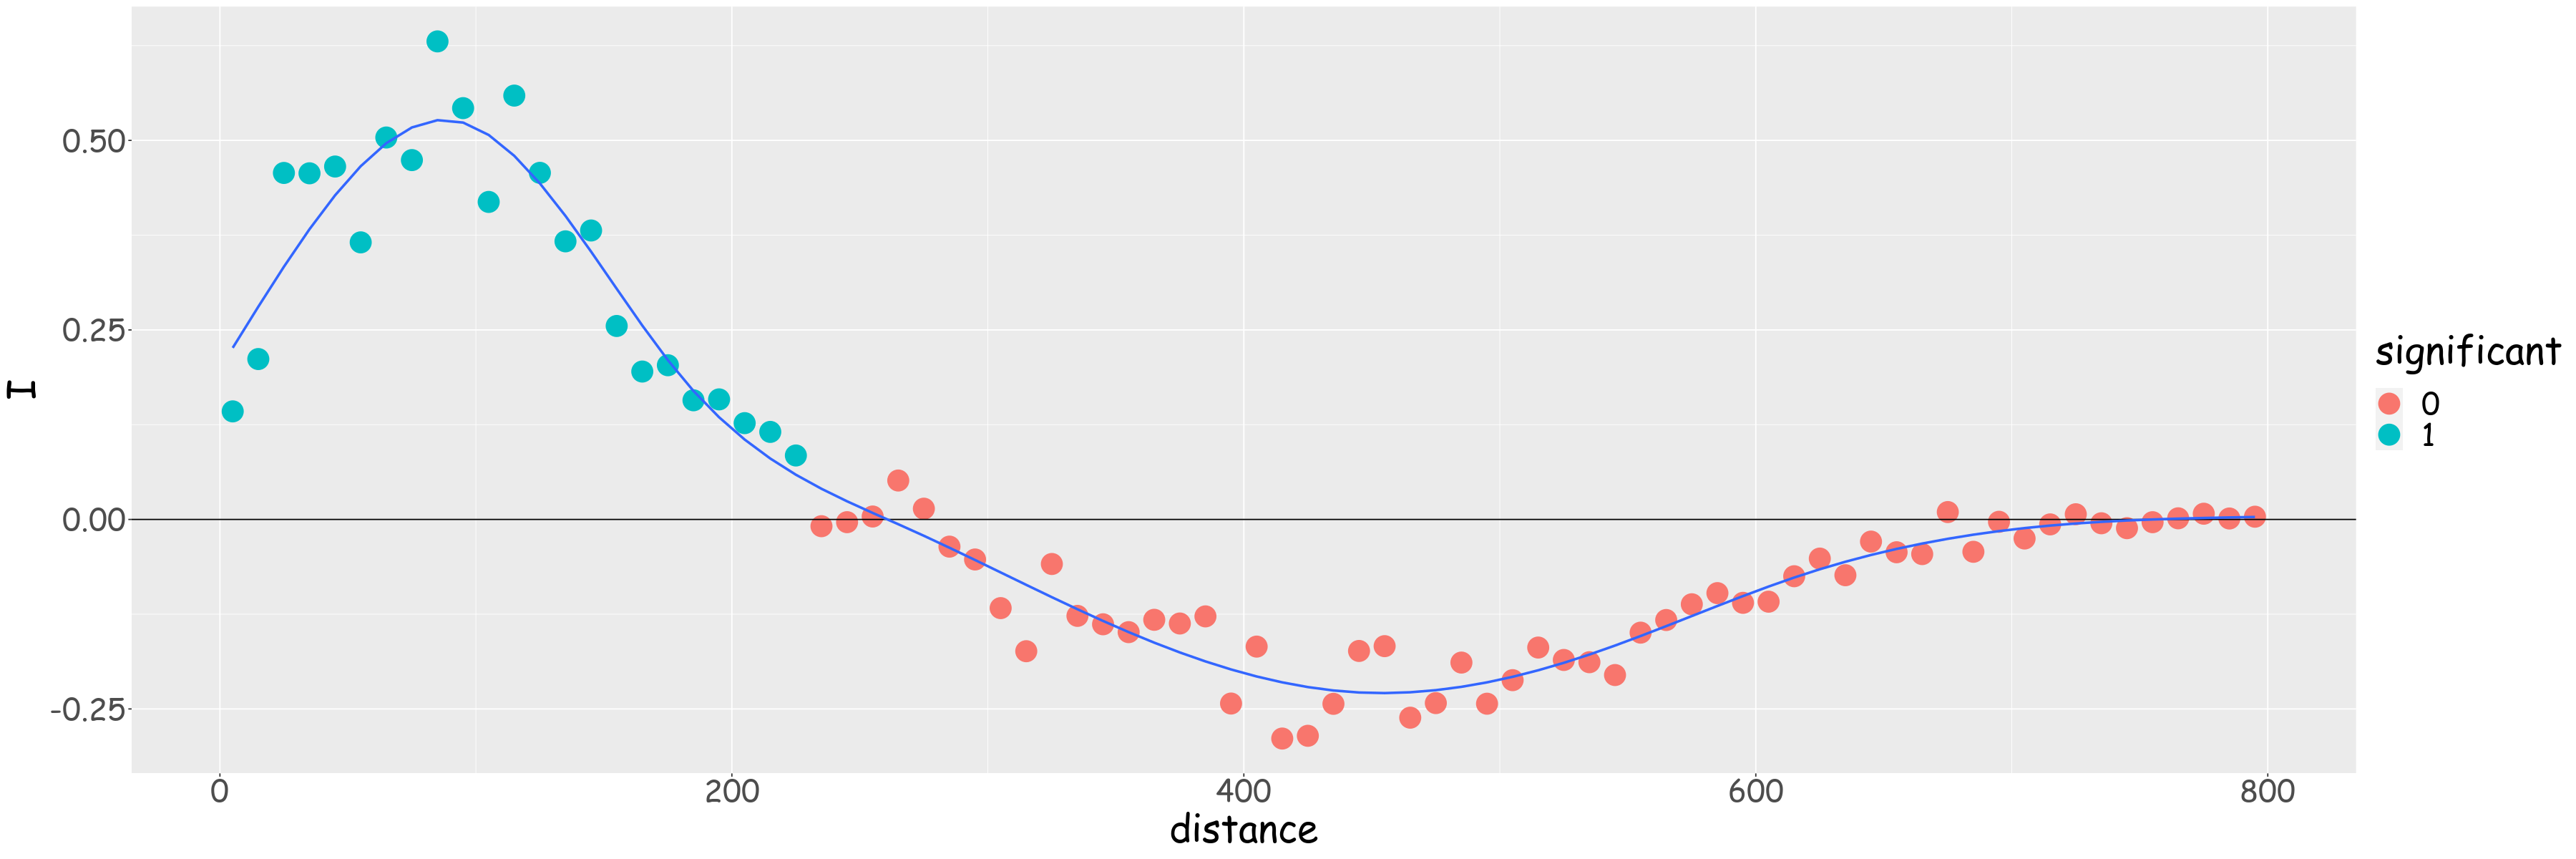

In [126]:
crlg.b <- c()
for (i in 1:nBins) {
    binCenter <- binCenters[i]
    MI <- dist2mi(pad$b, coo, binCenter-binWidth/2, binCenter+binWidth/2)
    mi <- as.numeric(MI$statistic)
    signif <- MI$p.value < 0.05
    crlg.b <- rbind(crlg.b, c(binCenter, mi, signif))
}
df.b <- tibble(data.frame(crlg.b))
colnames(df.b) <- c("distance", "I", "significant")
df.b$significant <- as.character(df.b$significant)
df.b %>%
    ggplot() +
    geom_point(aes(x=distance, y=I, col=significant),size=8) +
    geom_hline(yintercept = 0) +
    theme(text=element_text(size=32,  family="Comic Sans MS")) +
    geom_smooth(aes(x=distance, y=I), method="gam", se=F)



## Local Moran's I

For the next topic, I will use the Delauney triangulation (i.e., the neihborhood relation derived from the Voronoi tesslation).

Let us re-consider the linear regression that let to Moran's I. We can quantify for each observation how strongly it contributes to the regression coefficient.


In [127]:
pad_nb <- poly2nb(pad_voronoi, queen=TRUE)
pad_lw <- nb2listw(pad_nb, style="W", zero.policy = T)

In [128]:
options(repr.plot.width=10, repr.plot.height=7)

`geom_smooth()` using formula 'y ~ x'


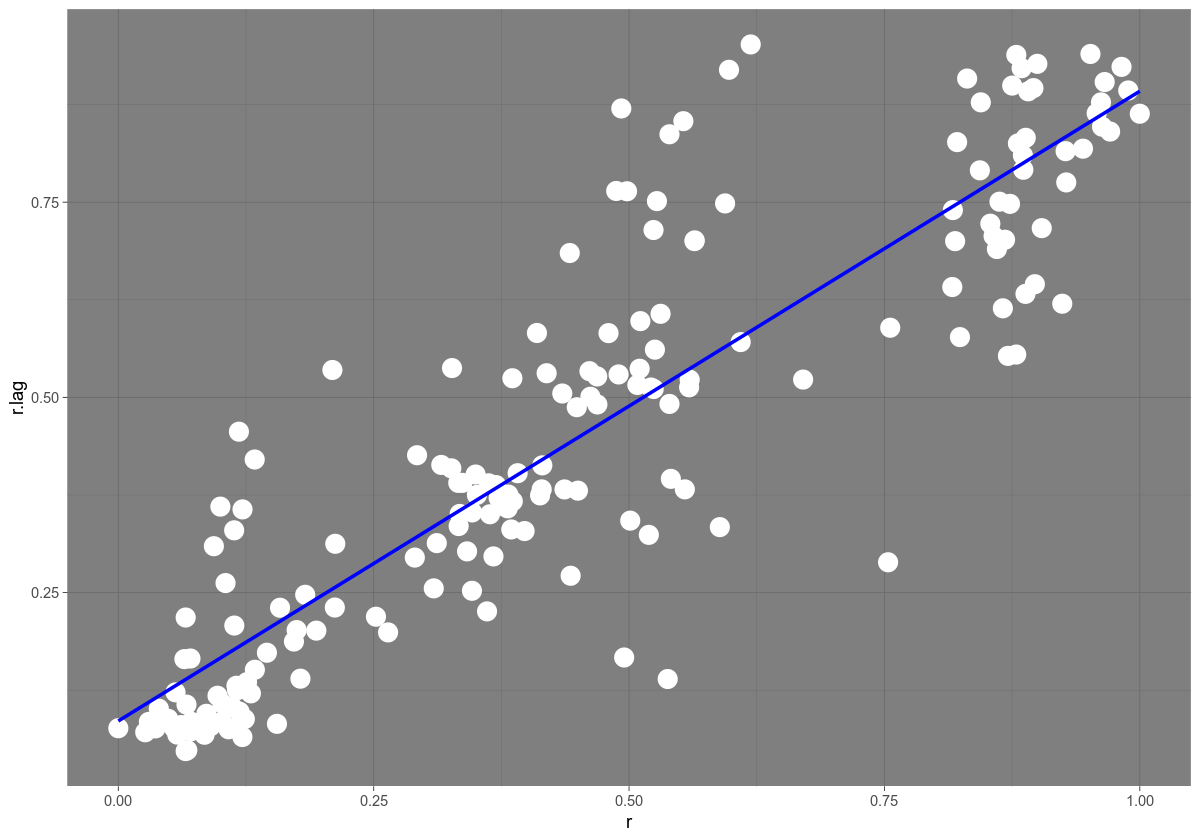

In [129]:
pad_voronoi %>% 
    ggplot() +
    geom_point(aes(x=r, y=r.lag), size=5, col='white') +
    geom_smooth(aes(x=r, y=r.lag), method='lm', se=F, col='blue') +
    theme_dark()
    



The formula for Moran's I is

$$
\begin{aligned}
I &= \frac{N}{W} \frac{\sum_{i,j} w_{ij}(x_i-\overline{x})(x_j-\overline{x})}{\sum_i(x_i-\overline{x})^2}\\
& = \frac{N}{W\sum_j(x_j-\overline{x})^2} \sum_i (x_i-\overline{x})\sum_j w_{ij}(x_j-\overline{x})
\end{aligned}
$$

Leaving out the first $\sum$ gives us the individual contributions of each data point.

$$
\begin{aligned}
I_i &\propto (x_i-\overline{x})\sum_j w_{ij}(x_j-\overline{x})
\end{aligned}
$$

`geom_smooth()` using formula 'y ~ x'


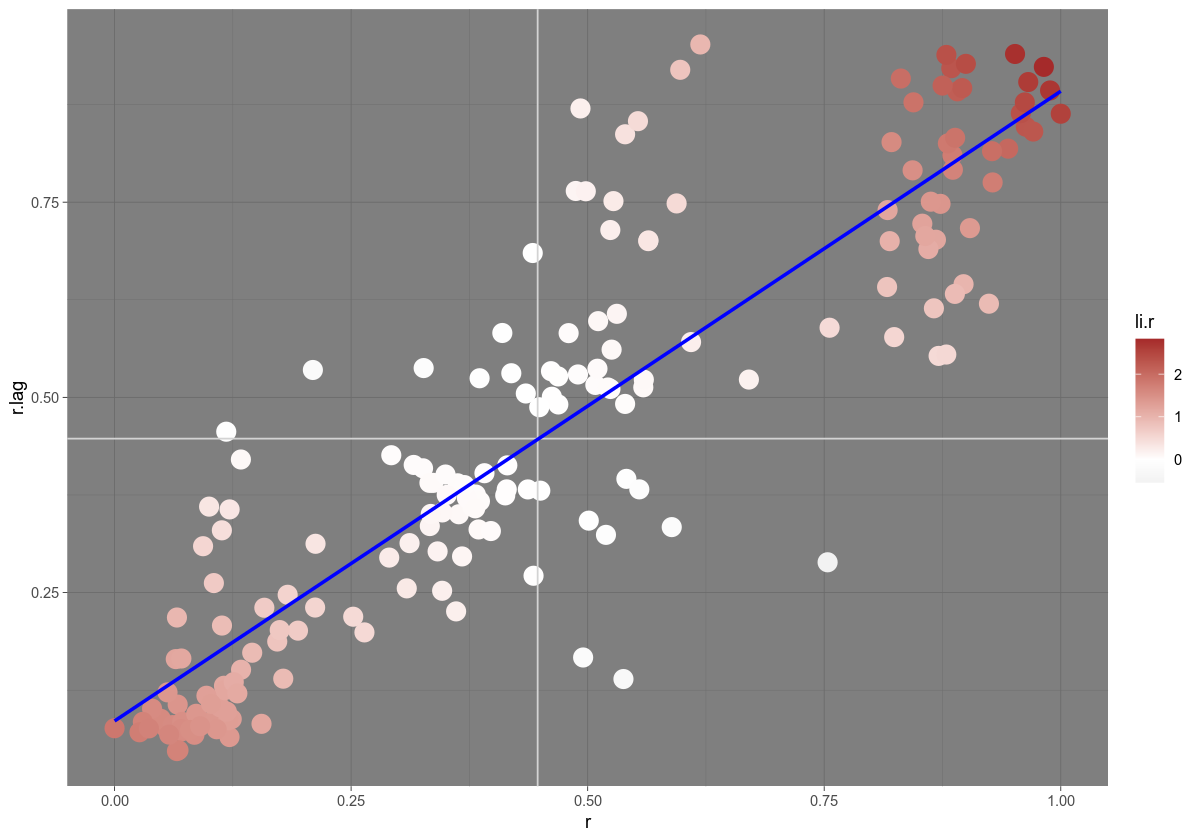

In [133]:
pad_voronoi %>% 
    mutate(li.r = localmoran(pad_voronoi$r, pad_lw)[,1]) %>%
    ggplot() +
    geom_point(aes(x=r, y=r.lag, col=li.r), size=5) +
    scale_color_gradient2(
    low = "grey", 
    mid = "white", 
    high = "brown", 
    midpoint = 0
    ) + 
    geom_hline(yintercept = mean(pad_voronoi$r), col='lightgrey')+
    geom_vline(xintercept = mean(pad_voronoi$r), col='lightgrey')+
    geom_smooth(aes(x=r, y=r.lag), method='lm', se=F, col='blue') +
    theme_dark()
    



*Local Moran's I* is a measure of the degree to which the value at a point can be predicted from its neighborhood.

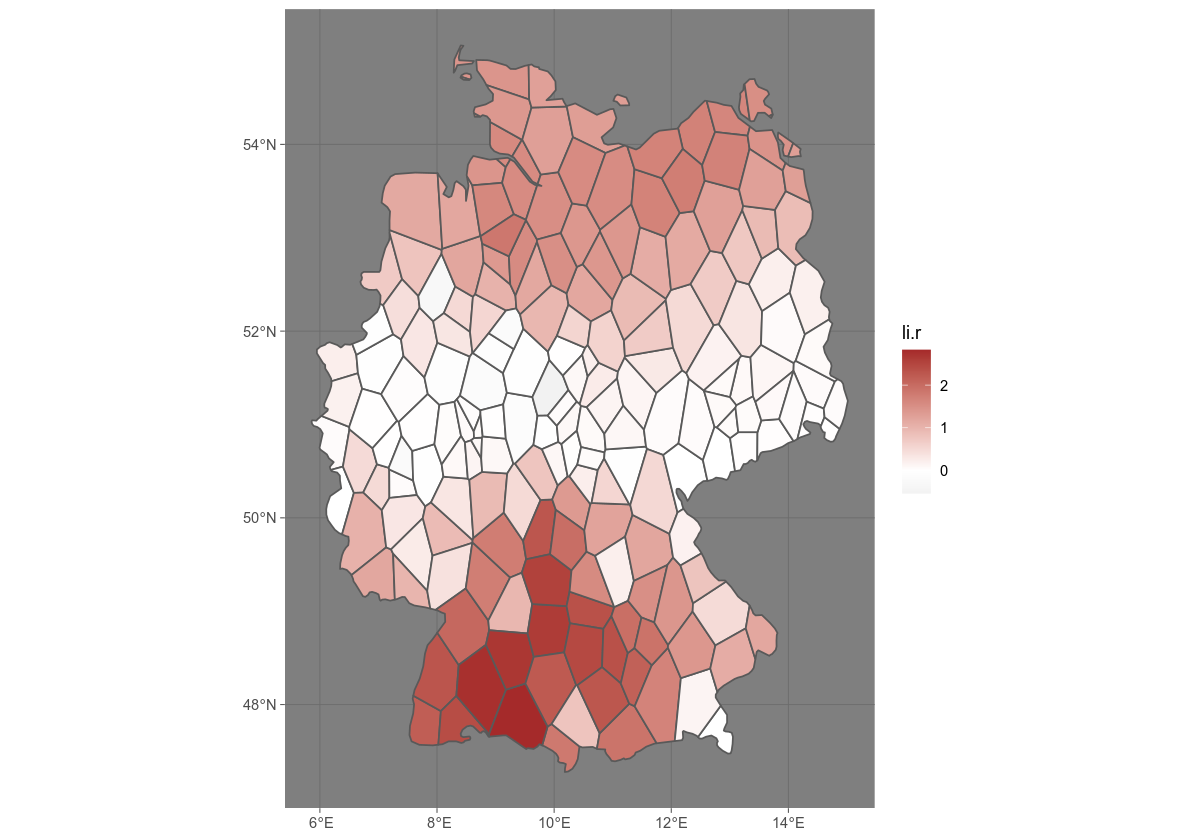

In [132]:
pad_voronoi %>% 
    mutate(li.r = localmoran(pad_voronoi$r, pad_lw)[,1]) %>%
    ggplot() +
    geom_sf(aes(fill=li.r)) +
    scale_fill_gradient2(
    low = "grey", 
    mid = "white", 
    high = "brown", 
    midpoint = 0
  ) +theme_dark()
    



The same procedure for the other two dimensions.

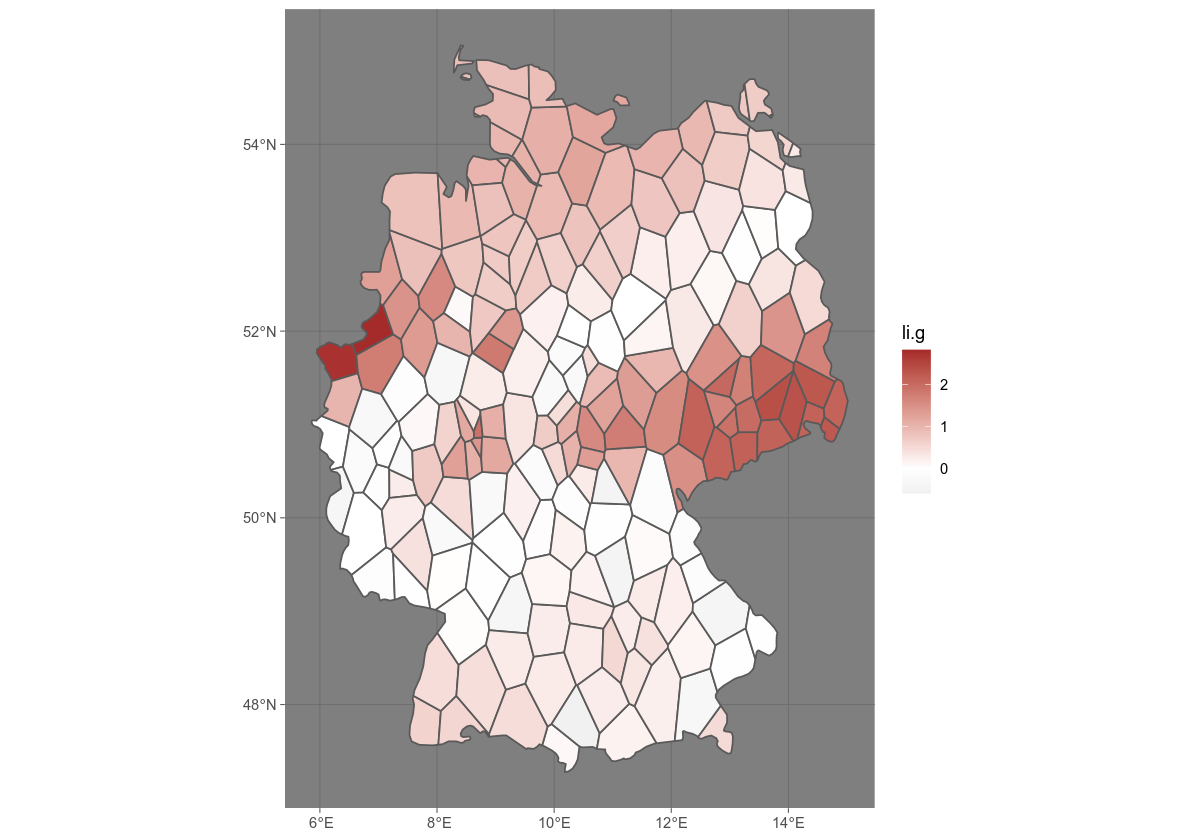

In [135]:
pad_voronoi %>% 
    mutate(li.g = localmoran(pad_voronoi$g, pad_lw)[,1]) %>%
    ggplot() +
    geom_sf(aes(fill=li.g)) +
    scale_fill_gradient2(
    low = "grey", 
    mid = "white", 
    high = "brown", 
    midpoint = 0
  ) + theme_dark()
    



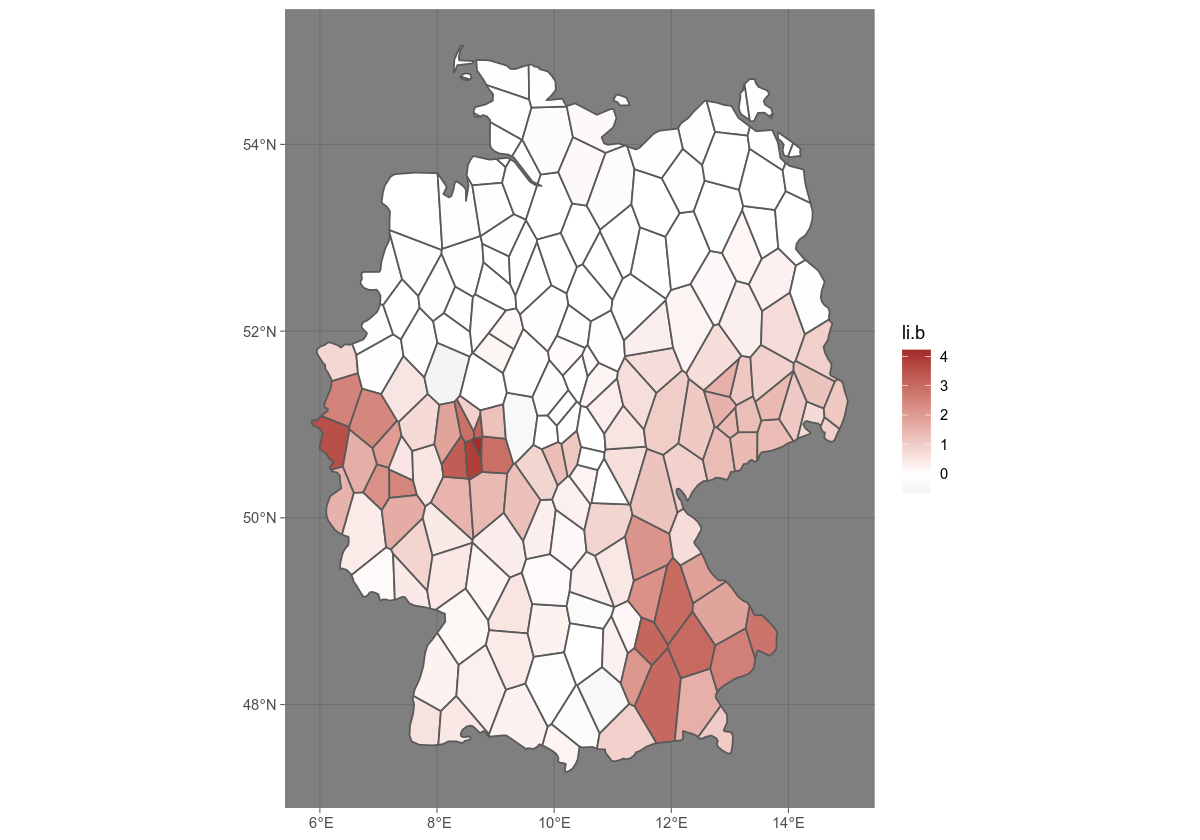

In [137]:
pad_voronoi %>% 
    mutate(li.b = localmoran(pad_voronoi$b, pad_lw)[,1]) %>%
    ggplot() +
    geom_sf(aes(fill=li.b)) +
    scale_fill_gradient2(
    low = "grey", 
    mid = "white", 
    high = "brown", 
    midpoint = 0
  ) + theme_dark()
    